# Info1605 Data Science Engineering Methods Fall 2021, Northeastern University

## Project: Tripadvisor European Restaurants Analysis and Rating Prediction

### Group 18: Sushmitha Jogula - 001546751 and Gautham Rajsimha Pulipati - 001572432

## About the Project

Food business employees over 4.82 million people with a turnover of 1.2 trillion euros in the Europe. It is a competitive business and takes tremendous amount of work to run a successful restaurant. There are new restaurants being opened everyday and our idea is to build a model where we take various factors of a restaurant into consideration and predict the restaurant's rating. Being avid travelers and frequent users of the Tripadvisor website, we thought this would be the apt dataset to explore for our project and to understand various factors of restaurants that contribute in making a restaurant successful and appreciated by the users, while performing a comparative analysis of common features of restaurants across several European countries such as average rating, open hours, awards, locations etc. Every company wants to know if it will be successful or not, with the restaurant rating being one of the most essential factors in deciding that. It not only indicates the quality and services provided by that restaurant, but it also aids in attracting new customers. Also, it is imperative to consider some factors here such as an area's demographics, degree of influence of people that live in the area,  restaurant's theme. This project can reveal what customers consider most important in a restaurant, generate insights on what combinations of features one should adopt when launching a new restaurant and how likely it can succeed.

We ponder over features such as location, type of restaurant, unique features, working hours etc. with the given dataset and estimate if these factors play a role in predicting a restaurant's rating. We then train the model using 6 Machine Learning algorithms, Linear Regression, Decision Tree Regression, Support Vector Regression, Random Forest Regression, Graduent Boosting Regression and Gradient Regression with GridSearch and choose the best model that fits the dataset.

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys

from matplotlib import rcParams
from collections import Counter
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
# Reading the TripAdvisor European Restaurants dataset
restaurants_df = pd.read_csv("restaurants.csv")
restaurants_df.head()

/Users/gauthamrajsimhapulipati/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,...,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,...,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,...,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN


### About the Dataset 
Done by Sushmita Jogula

In [3]:
# Dataframe information
restaurants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 42 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_link                    1083397 non-null  object 
 1   restaurant_name                    1083397 non-null  object 
 2   original_location                  1083397 non-null  object 
 3   country                            1083397 non-null  object 
 4   region                             1033074 non-null  object 
 5   province                           742765 non-null   object 
 6   city                               682712 non-null   object 
 7   address                            1083397 non-null  object 
 8   latitude                           1067607 non-null  float64
 9   longitude                          1067607 non-null  float64
 10  claimed                            1081555 non-null  object 
 11  awards                  

In [4]:
#Dataframe description
restaurants_df.describe()

,latitude,longitude,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere
count,1.067607e+06,1.067607e+06,593832.000000,593832.000000,593832.000000,986761.000000,1.031162e+06,988204.000000,988204.000000,988204.000000,988204.000000,988204.000000,988204.000000,599325.000000,604287.000000,602692.000000,261785.000000
mean,4.656718e+01,5.838040e+00,6.327081,62.023282,7.630754,4.035943,1.028890e+02,44.563415,24.653440,10.490516,4.109302,2.355306,2.954850,4.104179,4.067245,3.982897,3.933682
std,5.882611e+00,8.639410e+00,0.966734,30.538134,2.550128,0.713694,2.672415e+02,148.728179,89.850801,35.512256,15.669631,9.352756,11.030069,0.564208,0.581267,0.577605,0.555262
min,2.764031e+01,-7.121809e+01,1.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,4.190986e+01,-8.027315e-01,6.000000,39.000000,6.000000,3.500000,6.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,3.500000,3.500000
50%,4.658510e+01,5.646530e+00,7.000000,58.500000,7.000000,4.000000,2.400000e+01,7.000000,3.000000,2.000000,1.000000,0.000000,0.000000,4.000000,4.000000,4.000000,4.000000
75%,5.140537e+01,1.223767e+01,7.000000,81.500000,7.000000,4.500000,9.300000e+01,26.000000,13.000000,6.000000,2.000000,1.000000,2.000000,4.500000,4.500000,4.500000,4.500000
max,6.994156e+01,3.336942e+01,7.000000,168.000000,15.000000,5.000000,5.240400e+04,15229.000000,9383.000000,4091.000000,2132.000000,1253.000000,1215.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
#shape and data types of the data
print('Shape and Data Types of dataset:')
print(restaurants_df.shape)
print(restaurants_df.dtypes)

#numeric columns
restaurants_df_numeric = restaurants_df.select_dtypes(include=[np.number])
numeric_cols = restaurants_df_numeric.columns.values
print('\n Numeric columns of dataset:')
print(numeric_cols)

#non numeric columns
restaurants_df_non_numeric = restaurants_df.select_dtypes(exclude=[np.number])
non_numeric_cols = restaurants_df_non_numeric.columns.values
print('\n Non-Numeric columns of dataset:')
print(non_numeric_cols)

Shape and Data Types of dataset:
(1083397, 42)
restaurant_link                       object
restaurant_name                       object
original_location                     object
country                               object
region                                object
province                              object
city                                  object
address                               object
latitude                             float64
longitude                            float64
claimed                               object
awards                                object
popularity_detailed                   object
popularity_generic                    object
top_tags                              object
price_level                           object
price_range                           object
meals                                 object
cuisines                              object
special_diets                         object
features                              object
vegetari

### Pandas Profiling Report
Done by Sushmita Jogula

In [6]:
# The Pandas Profile Report is run and the report is generated. 
# We will attach the profile report file in the final submission.
profile = ProfileReport(restaurants_df, title='Pandas Profiling Report', explorative=True)
profile.to_file("pandas_profile_report.html")

### Visualizing Missing Values of the Dataset
Done by Gautham Rajsimha

<AxesSubplot:>

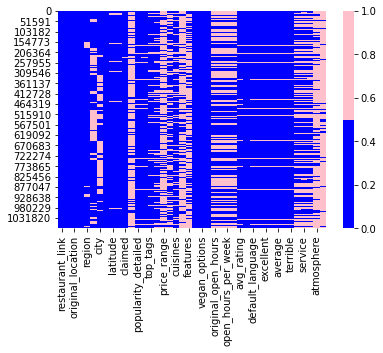

In [7]:
#a) Using Heatmap
%matplotlib inline
cols = restaurants_df.columns[:42] 
colours = ['blue', 'pink'] #blue indicates not missing, pink indicates missing values
sns.heatmap(restaurants_df[cols].isnull(), cmap=sns.color_palette(colours))

In [8]:
#b) Calculating percentage of missing values in the dataset columns
for col in restaurants_df.columns:
    pct_missing = np.mean(restaurants_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

restaurant_link - 0%
restaurant_name - 0%
original_location - 0%
country - 0%
region - 5%
province - 31%
city - 37%
address - 0%
latitude - 1%
longitude - 1%
claimed - 0%
awards - 76%
popularity_detailed - 9%
popularity_generic - 9%
top_tags - 10%
price_level - 26%
price_range - 72%
meals - 41%
cuisines - 16%
special_diets - 69%
features - 71%
vegetarian_friendly - 0%
vegan_options - 0%
gluten_free - 0%
original_open_hours - 45%
open_days_per_week - 45%
open_hours_per_week - 45%
working_shifts_per_week - 45%
avg_rating - 9%
total_reviews_count - 5%
default_language - 9%
reviews_count_in_default_language - 9%
excellent - 9%
very_good - 9%
average - 9%
poor - 9%
terrible - 9%
food - 45%
service - 44%
value - 44%
atmosphere - 76%
keywords - 91%


### Using Missingno Library
Done by Gautham Rajsimha

<AxesSubplot:>

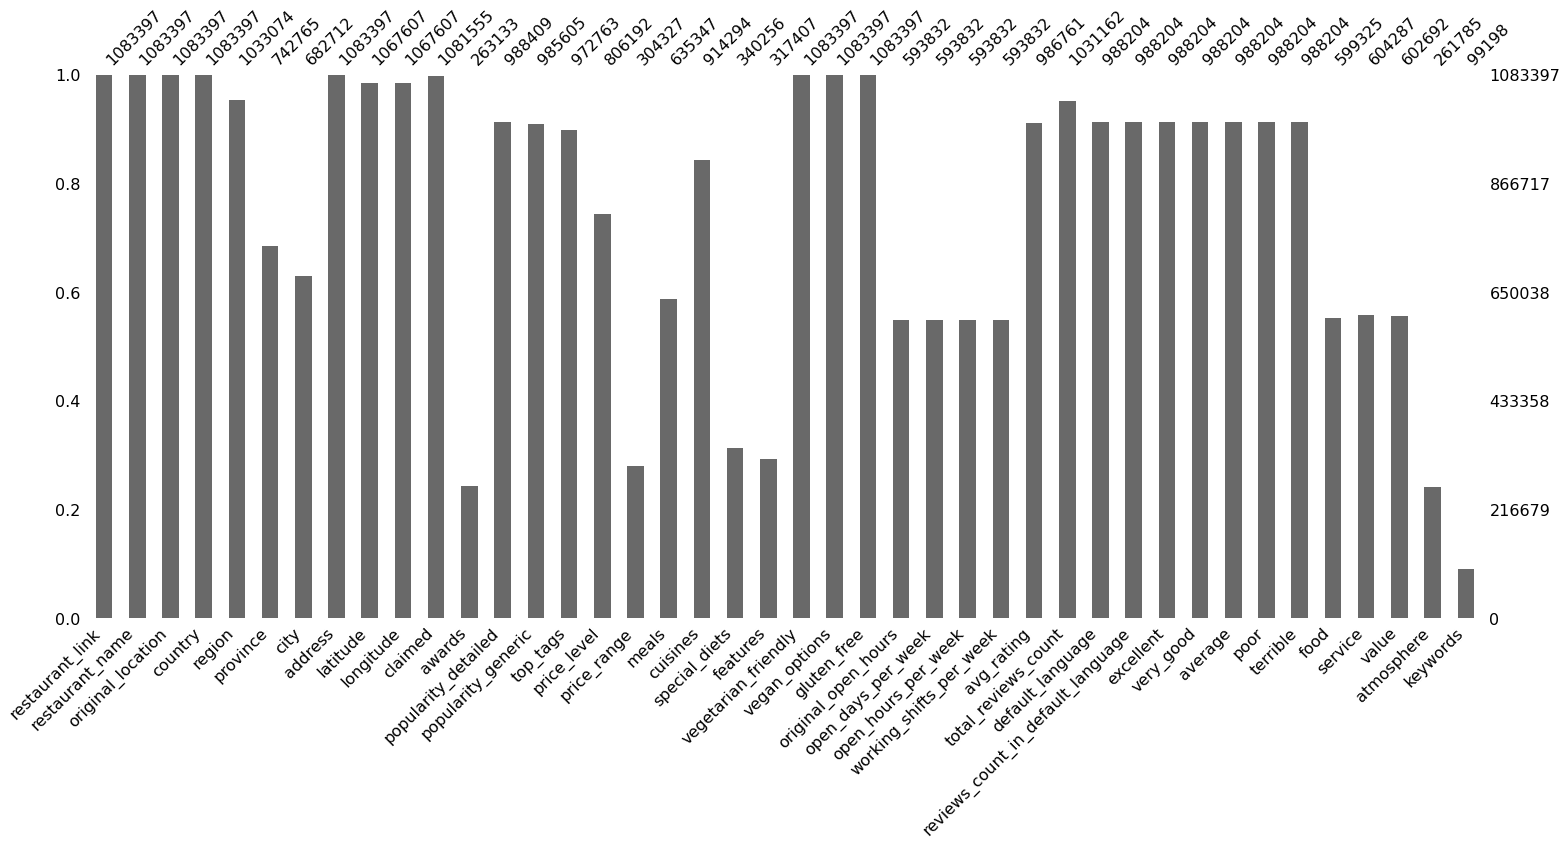

In [9]:
import missingno as msno

#bar chart of missing values
msno.bar(restaurants_df)

<AxesSubplot:>

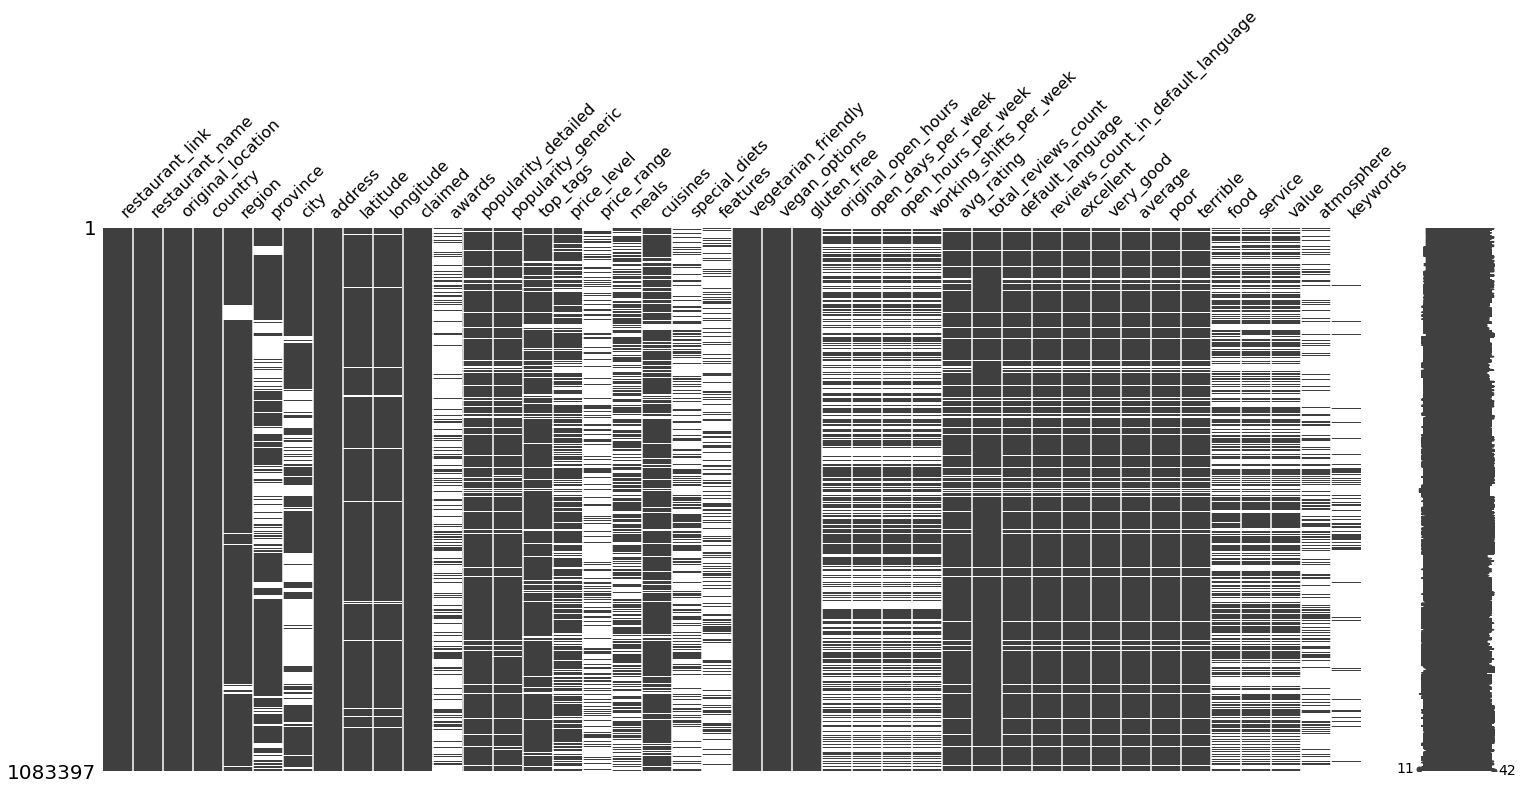

In [10]:
#Matrix plot of missing values
msno.matrix(restaurants_df)

<AxesSubplot:>

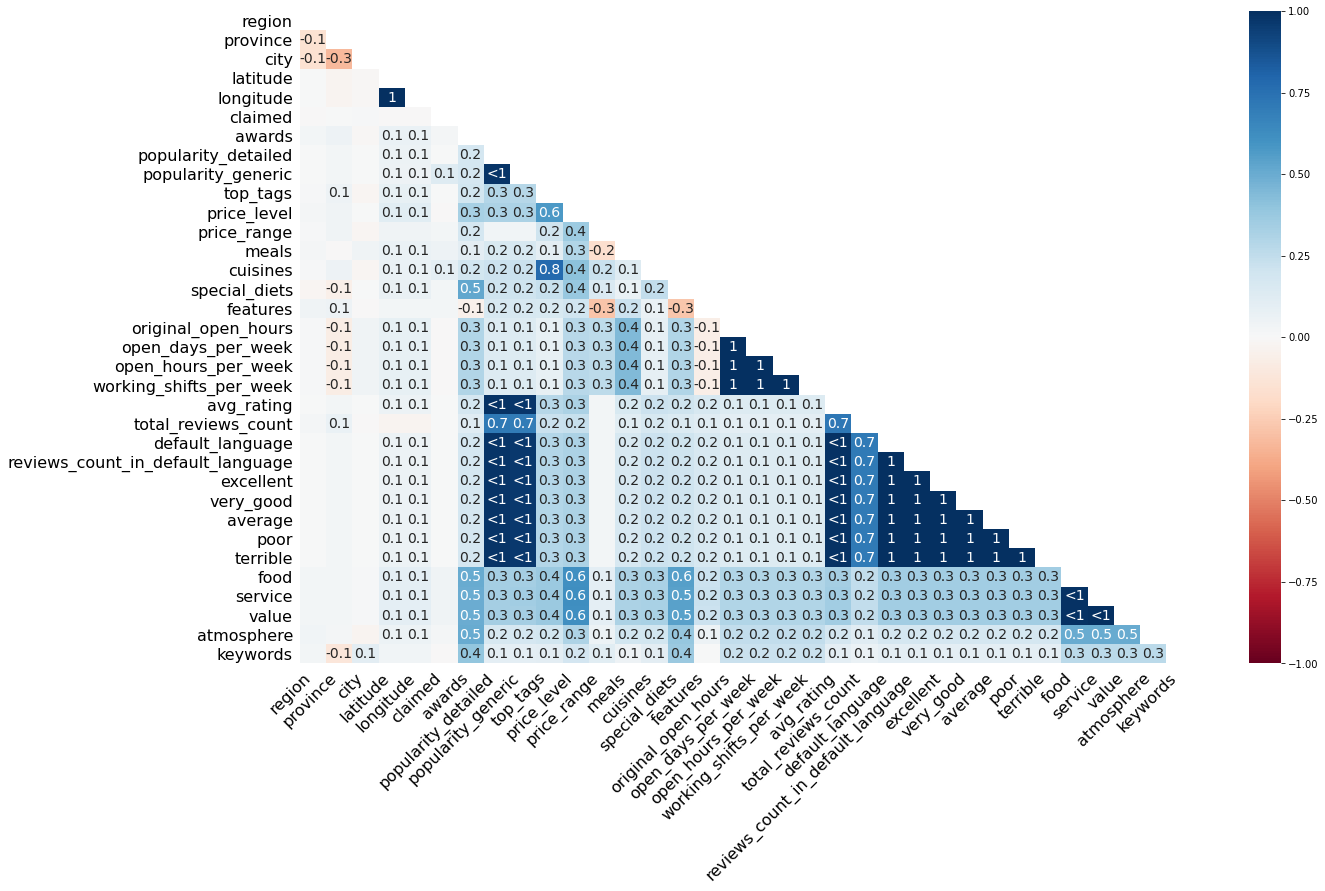

In [11]:
#Heatmap of missing values
msno.heatmap(restaurants_df)

## Initial Data Cleaning

In [13]:
#Step 1: Removing columns not required
restaurants_df.drop(['restaurant_link','default_language',
                     'original_location', 'latitude', 'longitude', 
                     'price_level', 'original_open_hours', 'working_shifts_per_week'], 
                    axis = 1, inplace = True)

In [14]:
restaurants_df.head()

,restaurant_name,country,region,province,city,address,claimed,awards,popularity_detailed,popularity_generic,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,Le 147,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",Claimed,NaN,#1 of 2 Restaurants in Saint-Jouvent,#1 of 2 places to eat in Saint-Jouvent,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,Le Saint Jouvent,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",Unclaimed,NaN,#2 of 2 Restaurants in Saint-Jouvent,#2 of 2 places to eat in Saint-Jouvent,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,Au Bout du Pont,France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",Claimed,NaN,#1 of 1 Restaurant in Rivarennes,#1 of 1 places to eat in Rivarennes,...,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,Le Relais de Naiade,France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",Claimed,NaN,#1 of 1 Restaurant in Lacelle,#1 of 1 places to eat in Lacelle,...,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,Relais Du MontSeigne,France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",Unclaimed,NaN,#1 of 1 Restaurant in Saint-Laurent-de-Levezou,#1 of 1 places to eat in Saint-Laurent-de-Levezou,...,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN


In [15]:
#Step 2: Rename columns for easy understanding and usage
restaurants_df = restaurants_df.rename(columns={'claimed':'claimed_by_tripadvisor',
                                                'open_days_per_week':'weekly_working_days',
                                                'open_hours_per_week':'weekly_working_hours', 
                                                'food':'food_rating', 'service':'service_rating', 
                                                'value':'value_rating', 'atmosphere':'atmosphere_rating'})

In [16]:
restaurants_df

,restaurant_name,country,region,province,city,address,claimed_by_tripadvisor,awards,popularity_detailed,popularity_generic,...,excellent,very_good,average,poor,terrible,food_rating,service_rating,value_rating,atmosphere_rating,keywords
0,Le 147,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",Claimed,NaN,#1 of 2 Restaurants in Saint-Jouvent,#1 of 2 places to eat in Saint-Jouvent,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,Le Saint Jouvent,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",Unclaimed,NaN,#2 of 2 Restaurants in Saint-Jouvent,#2 of 2 places to eat in Saint-Jouvent,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,Au Bout du Pont,France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",Claimed,NaN,#1 of 1 Restaurant in Rivarennes,#1 of 1 places to eat in Rivarennes,...,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,Le Relais de Naiade,France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",Claimed,NaN,#1 of 1 Restaurant in Lacelle,#1 of 1 places to eat in Lacelle,...,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,Relais Du MontSeigne,France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",Unclaimed,NaN,#1 of 1 Restaurant in Saint-Laurent-de-Levezou,#1 of 1 places to eat in Saint-Laurent-de-Levezou,...,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083392,Complex Popas Pacurari,Romania,Northeast Romania,Iasi County,NaN,"Soseaua Pacurari, Valea Lupului 707410 Romania",Unclaimed,NaN,#1 of 1 Restaurant in Valea Lupului,#1 of 1 places to eat in Valea Lupului,...,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
1083393,Casa Pastravarului DORIPESCO,Romania,Transylvania,Brasov County,Apata,"DN 13 Judetul Kilometrul 33 Maierus, Apata 507...",Claimed,NaN,#1 of 1 Restaurant in Apata,#1 of 1 places to eat in Apata,...,0.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN
1083394,Hanul Tentea,Romania,Transylvania,Maramures County,Sacel,"DN17C, Sacel Romania",Unclaimed,NaN,#1 of 1 Restaurant in Sacel,#1 of 1 places to eat in Sacel,...,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
1083395,Casa Paduraru,Romania,Southern Romania,Arges County,NaN,"Sat. Argeselu Numarul 432, Maracineni 117450 R...",Claimed,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
restaurants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 34 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_name                    1083397 non-null  object 
 1   country                            1083397 non-null  object 
 2   region                             1033074 non-null  object 
 3   province                           742765 non-null   object 
 4   city                               682712 non-null   object 
 5   address                            1083397 non-null  object 
 6   claimed_by_tripadvisor             1081555 non-null  object 
 7   awards                             263133 non-null   object 
 8   popularity_detailed                988409 non-null   object 
 9   popularity_generic                 985605 non-null   object 
 10  top_tags                           972763 non-null   object 
 11  price_range             

In [18]:
#Step 3: Cleaning data
restaurants_df['region'] = restaurants_df['region'].replace('',np.NaN)
restaurants_df['province'] = restaurants_df['province'].replace('',np.NaN)
restaurants_df['city'] = restaurants_df['city'].replace('',np.NaN)
restaurants_df['claimed_by_tripadvisor'] = restaurants_df['claimed_by_tripadvisor'].replace('',np.NaN)
restaurants_df['popularity_detailed'] = restaurants_df['popularity_detailed'].replace('',np.NaN)
restaurants_df['popularity_generic'] = restaurants_df['popularity_generic'].replace('',np.NaN)
restaurants_df['top_tags'] = restaurants_df['top_tags'].replace('',np.NaN)
restaurants_df['special_diets'] = restaurants_df['special_diets'].replace('',np.NaN)
restaurants_df['features'] = restaurants_df['features'].replace('',np.NaN)
restaurants_df['food_rating'] = restaurants_df['food_rating'].replace(np.NaN,0)
restaurants_df['service_rating'] = restaurants_df['service_rating'].replace(np.NaN,0)
restaurants_df['value_rating'] = restaurants_df['value_rating'].replace(np.NaN,0)
restaurants_df['atmosphere_rating'] = restaurants_df['atmosphere_rating'].replace(np.NaN,0)
restaurants_df['weekly_working_days'] = restaurants_df['weekly_working_days'].replace(np.NaN,0)
restaurants_df['weekly_working_hours'] = restaurants_df['weekly_working_hours'].replace(np.NaN,0)

In [19]:
# Viewing all null values across columns
restaurants_df.isnull().sum()

restaurant_name                           0
country                                   0
region                                50323
province                             340632
city                                 400685
address                                   0
claimed_by_tripadvisor                 1842
awards                               820264
popularity_detailed                   94988
popularity_generic                    97792
top_tags                             110634
price_range                          779070
meals                                448050
cuisines                             169103
special_diets                        743141
features                             765990
vegetarian_friendly                       0
vegan_options                             0
gluten_free                               0
weekly_working_days                       0
weekly_working_hours                      0
avg_rating                            96636
total_reviews_count             

In [20]:
#Step 4: Changing categorical features for statistical computation
restaurants_df.claimed_by_tripadvisor = restaurants_df.claimed_by_tripadvisor.apply(lambda x: '1' if str(x)=='Claimed' 
                                                                                    else '0')
restaurants_df.vegetarian_friendly = restaurants_df.vegetarian_friendly.apply(lambda x: '0' if str(x)=='N' else '1')
restaurants_df.vegan_options = restaurants_df.vegan_options.apply(lambda x: '0' if str(x)=='N' else '1')
restaurants_df.gluten_free = restaurants_df.gluten_free.apply(lambda x: '0' if str(x)=='N' else '1')

In [21]:
restaurants_df

,restaurant_name,country,region,province,city,address,claimed_by_tripadvisor,awards,popularity_detailed,popularity_generic,...,excellent,very_good,average,poor,terrible,food_rating,service_rating,value_rating,atmosphere_rating,keywords
0,Le 147,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",1,NaN,#1 of 2 Restaurants in Saint-Jouvent,#1 of 2 places to eat in Saint-Jouvent,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,0.0,NaN
1,Le Saint Jouvent,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",0,NaN,#2 of 2 Restaurants in Saint-Jouvent,#2 of 2 places to eat in Saint-Jouvent,...,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,Au Bout du Pont,France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",1,NaN,#1 of 1 Restaurant in Rivarennes,#1 of 1 places to eat in Rivarennes,...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,Le Relais de Naiade,France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",1,NaN,#1 of 1 Restaurant in Lacelle,#1 of 1 places to eat in Lacelle,...,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,0.0,NaN
4,Relais Du MontSeigne,France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",0,NaN,#1 of 1 Restaurant in Saint-Laurent-de-Levezou,#1 of 1 places to eat in Saint-Laurent-de-Levezou,...,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083392,Complex Popas Pacurari,Romania,Northeast Romania,Iasi County,NaN,"Soseaua Pacurari, Valea Lupului 707410 Romania",0,NaN,#1 of 1 Restaurant in Valea Lupului,#1 of 1 places to eat in Valea Lupului,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
1083393,Casa Pastravarului DORIPESCO,Romania,Transylvania,Brasov County,Apata,"DN 13 Judetul Kilometrul 33 Maierus, Apata 507...",1,NaN,#1 of 1 Restaurant in Apata,#1 of 1 places to eat in Apata,...,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,NaN
1083394,Hanul Tentea,Romania,Transylvania,Maramures County,Sacel,"DN17C, Sacel Romania",0,NaN,#1 of 1 Restaurant in Sacel,#1 of 1 places to eat in Sacel,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
1083395,Casa Paduraru,Romania,Southern Romania,Arges County,NaN,"Sat. Argeselu Numarul 432, Maracineni 117450 R...",1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN


## Adding New Measures for Visualization purposes
Done by Gautham Rajsimha

In [22]:
#Adding Number of Awards measure

num_awards = []
restaurants_df.awards = restaurants_df.awards.astype(str)
for i in range(0,len(restaurants_df.index)): 
    if restaurants_df.loc[i,'awards'] != 'nan':
        num_awards.append(len(restaurants_df.loc[i,'awards'].split(',')))     
    else:
        num_awards.append(0)
restaurants_df['Number of Awards'] = num_awards   
restaurants_df['Number of Awards'] = restaurants_df['Number of Awards'].astype(int) 

In [23]:
restaurants_df[restaurants_df['Number of Awards']!=0]

,restaurant_name,country,region,province,city,address,claimed_by_tripadvisor,awards,popularity_detailed,popularity_generic,...,very_good,average,poor,terrible,food_rating,service_rating,value_rating,atmosphere_rating,keywords,Number of Awards
5,L'Auberge Du Vieux Crozet,France,Auvergne-Rhone-Alpes,Loire,Le Crozet,59 place du Puits ancienne adresse le Bourg re...,1,"Travellers' Choice, Certificate of Excellence ...",#1 of 1 Restaurant in Le Crozet,#1 of 1 places to eat in Le Crozet,...,15.0,2.0,2.0,1.0,4.5,4.5,4.5,0.0,NaN,2
7,L'entre 2,France,Occitanie,Aude,Saint-Denis,"4 route de Saissac, 11310 Saint-Denis France",1,"Travellers' Choice, Certificate of Excellence ...",#1 of 2 Restaurants in Saint-Denis,#1 of 2 places to eat in Saint-Denis,...,3.0,1.0,0.0,0.0,4.5,4.5,4.5,0.0,NaN,5
9,Chez Claudine,France,Grand Est,Vosges,They-sous-Montfort,"136 rue de la Petite They, 88800 They-sous-Mon...",1,"Travellers' Choice, Certificate of Excellence ...",#1 of 1 Restaurant in They-sous-Montfort,#1 of 1 places to eat in They-sous-Montfort,...,0.0,0.0,0.0,0.0,4.5,4.5,4.5,4.5,NaN,7
17,L'Antidote,France,Provence-Alpes-Cote d'Azur,Var,Rocbaron,"Fray Redon, 83136 Rocbaron France",1,"Travellers' Choice, Certificate of Excellence ...",#1 of 10 Restaurants in Rocbaron,#1 of 12 places to eat in Rocbaron,...,1.0,0.0,0.0,0.0,4.5,4.5,4.5,4.0,NaN,7
18,La terrasse,France,Provence-Alpes-Cote d'Azur,Var,Rocbaron,"10 rue des Faysonnes, 83136 Rocbaron France",0,"Certificate of Excellence 2018, Certificate of...",#4 of 10 Restaurants in Rocbaron,#4 of 12 places to eat in Rocbaron,...,28.0,10.0,4.0,1.0,4.5,4.0,4.5,0.0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083371,Christopher Pub,Romania,Southeast Romania,Constanta County,NaN,"Sos. Constantei 28, Mangalia 905500 Romania",0,Certificate of Excellence 2017,#6 of 21 Restaurants in Mangalia,#6 of 23 places to eat in Mangalia,...,16.0,3.0,4.0,9.0,4.0,3.0,3.5,0.0,NaN,1
1083376,Restaurant Radsor,Romania,Transylvania,Brasov County,Rasnov,"Ion Creanga 2, Rasnov 500400 Romania",1,"Certificate of Excellence 2019, Certificate of...",#4 of 14 Restaurants in Rasnov,#4 of 15 places to eat in Rasnov,...,15.0,7.0,4.0,3.0,4.5,4.5,4.5,0.0,NaN,2
1083378,La NOI,Romania,Transylvania,Brasov County,Rasnov,"Cheile Rasnoavei, Rasnov 505400 Romania",1,Certificate of Excellence 2019,#3 of 14 Restaurants in Rasnov,#3 of 15 places to eat in Rasnov,...,0.0,0.0,0.0,1.0,5.0,5.0,5.0,0.0,NaN,1
1083384,Sub Cetate Sergiana,Romania,Transylvania,Brasov County,Rasnov,"Strada Cetatii 34, Rasnov 505400 Romania",1,"Travellers' Choice, Certificate of Excellence ...",#2 of 14 Restaurants in Rasnov,#2 of 15 places to eat in Rasnov,...,7.0,4.0,3.0,1.0,5.0,4.5,5.0,0.0,"burger, ribs, free appetizer, rasnov fortress,...",2


In [24]:
#Cleaning price_range column and adding Average Price measure

min_price = []
max_price = []
restaurants_df.price_range = restaurants_df.price_range.astype(str)
restaurants_df.drop(restaurants_df[restaurants_df['price_range'].str.contains('CHF')].index, inplace = True)
restaurants_df['price_range'] = restaurants_df['price_range'].str.replace('€','')
restaurants_df['price_range'] = restaurants_df['price_range'].str.replace(',','')
for price in restaurants_df.loc[:,'price_range']: 
    if price is np.NaN or price == 'nan':
        min_price.append(0)
        max_price.append(0)
        
    else:
        price_range_split = price.split("-",1)
        min_price.append(price_range_split[0])
        max_price.append(price_range_split[1])
        
restaurants_df["Minimum Price"] = min_price
restaurants_df["Maximum Price"] = max_price
restaurants_df["Minimum Price"] = restaurants_df["Minimum Price"].astype(float)
restaurants_df["Maximum Price"] = restaurants_df["Maximum Price"].astype(float)
restaurants_df["Average Price"] = restaurants_df[['Minimum Price', 'Maximum Price']].mean(axis=1)

In [25]:
restaurants_df

,restaurant_name,country,region,province,city,address,claimed_by_tripadvisor,awards,popularity_detailed,popularity_generic,...,terrible,food_rating,service_rating,value_rating,atmosphere_rating,keywords,Number of Awards,Minimum Price,Maximum Price,Average Price
0,Le 147,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",1,nan,#1 of 2 Restaurants in Saint-Jouvent,#1 of 2 places to eat in Saint-Jouvent,...,0.0,4.0,4.5,4.0,0.0,NaN,0,0.0,0.0,0.0
1,Le Saint Jouvent,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",0,nan,#2 of 2 Restaurants in Saint-Jouvent,#2 of 2 places to eat in Saint-Jouvent,...,0.0,0.0,0.0,0.0,0.0,NaN,0,0.0,0.0,0.0
2,Au Bout du Pont,France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",1,nan,#1 of 1 Restaurant in Rivarennes,#1 of 1 places to eat in Rivarennes,...,0.0,0.0,0.0,0.0,0.0,NaN,0,0.0,0.0,0.0
3,Le Relais de Naiade,France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",1,nan,#1 of 1 Restaurant in Lacelle,#1 of 1 places to eat in Lacelle,...,0.0,4.5,4.5,4.5,0.0,NaN,0,0.0,0.0,0.0
4,Relais Du MontSeigne,France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",0,nan,#1 of 1 Restaurant in Saint-Laurent-de-Levezou,#1 of 1 places to eat in Saint-Laurent-de-Levezou,...,0.0,4.5,4.5,4.5,0.0,NaN,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083392,Complex Popas Pacurari,Romania,Northeast Romania,Iasi County,NaN,"Soseaua Pacurari, Valea Lupului 707410 Romania",0,nan,#1 of 1 Restaurant in Valea Lupului,#1 of 1 places to eat in Valea Lupului,...,1.0,0.0,0.0,0.0,0.0,NaN,0,0.0,0.0,0.0
1083393,Casa Pastravarului DORIPESCO,Romania,Transylvania,Brasov County,Apata,"DN 13 Judetul Kilometrul 33 Maierus, Apata 507...",1,nan,#1 of 1 Restaurant in Apata,#1 of 1 places to eat in Apata,...,2.0,0.0,0.0,0.0,0.0,NaN,0,0.0,0.0,0.0
1083394,Hanul Tentea,Romania,Transylvania,Maramures County,Sacel,"DN17C, Sacel Romania",0,nan,#1 of 1 Restaurant in Sacel,#1 of 1 places to eat in Sacel,...,1.0,0.0,0.0,0.0,0.0,NaN,0,0.0,0.0,0.0
1083395,Casa Paduraru,Romania,Southern Romania,Arges County,NaN,"Sat. Argeselu Numarul 432, Maracineni 117450 R...",1,nan,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,0,2.0,8.0,5.0


In [26]:
#Adding Restaurant Category measure
rest_category = []
restaurants_df.top_tags = restaurants_df.top_tags.astype(str)
for category in restaurants_df.loc[:,'top_tags']: 
    if category is np.NaN or category == 'nan' or category == '':
        rest_category.append('')
        
    else:
        tag_split = category.split(",",1)
        rest_category.append(tag_split[0])
        #max_price.append(price_range_split[1])
        
restaurants_df["Category"] = rest_category

In [27]:
restaurants_df

,restaurant_name,country,region,province,city,address,claimed_by_tripadvisor,awards,popularity_detailed,popularity_generic,...,food_rating,service_rating,value_rating,atmosphere_rating,keywords,Number of Awards,Minimum Price,Maximum Price,Average Price,Category
0,Le 147,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",1,nan,#1 of 2 Restaurants in Saint-Jouvent,#1 of 2 places to eat in Saint-Jouvent,...,4.0,4.5,4.0,0.0,NaN,0,0.0,0.0,0.0,Cheap Eats
1,Le Saint Jouvent,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",0,nan,#2 of 2 Restaurants in Saint-Jouvent,#2 of 2 places to eat in Saint-Jouvent,...,0.0,0.0,0.0,0.0,NaN,0,0.0,0.0,0.0,Cheap Eats
2,Au Bout du Pont,France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",1,nan,#1 of 1 Restaurant in Rivarennes,#1 of 1 places to eat in Rivarennes,...,0.0,0.0,0.0,0.0,NaN,0,0.0,0.0,0.0,Cheap Eats
3,Le Relais de Naiade,France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",1,nan,#1 of 1 Restaurant in Lacelle,#1 of 1 places to eat in Lacelle,...,4.5,4.5,4.5,0.0,NaN,0,0.0,0.0,0.0,Cheap Eats
4,Relais Du MontSeigne,France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",0,nan,#1 of 1 Restaurant in Saint-Laurent-de-Levezou,#1 of 1 places to eat in Saint-Laurent-de-Levezou,...,4.5,4.5,4.5,0.0,NaN,0,0.0,0.0,0.0,Mid-range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083392,Complex Popas Pacurari,Romania,Northeast Romania,Iasi County,NaN,"Soseaua Pacurari, Valea Lupului 707410 Romania",0,nan,#1 of 1 Restaurant in Valea Lupului,#1 of 1 places to eat in Valea Lupului,...,0.0,0.0,0.0,0.0,NaN,0,0.0,0.0,0.0,
1083393,Casa Pastravarului DORIPESCO,Romania,Transylvania,Brasov County,Apata,"DN 13 Judetul Kilometrul 33 Maierus, Apata 507...",1,nan,#1 of 1 Restaurant in Apata,#1 of 1 places to eat in Apata,...,0.0,0.0,0.0,0.0,NaN,0,0.0,0.0,0.0,Mid-range
1083394,Hanul Tentea,Romania,Transylvania,Maramures County,Sacel,"DN17C, Sacel Romania",0,nan,#1 of 1 Restaurant in Sacel,#1 of 1 places to eat in Sacel,...,0.0,0.0,0.0,0.0,NaN,0,0.0,0.0,0.0,
1083395,Casa Paduraru,Romania,Southern Romania,Arges County,NaN,"Sat. Argeselu Numarul 432, Maracineni 117450 R...",1,nan,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,0,2.0,8.0,5.0,Cheap Eats


## Graphical Data Exploration and Analysis
Done by Sushmita Jogula (ALL)

In [29]:
#Number of unique restaurants in Europe
print('There are total {} unique Restaurants in Europe'.format(len(restaurants_df['restaurant_name'].unique())))

There are total 837665 unique Restaurants in Europe


### 1) What are the most popular cities in Europe for restaurant business?

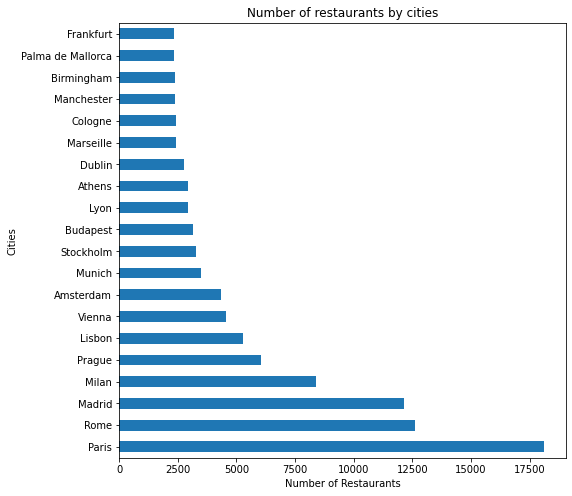

In [30]:
plt.figure(figsize = (8,8))
restaurants_df.city.value_counts().nlargest(20).plot(kind='barh')
plt.title("Number of restaurants by cities")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cities")
plt.show()

We can see that Paris and Rome are leading with most number of restaurants across Europe. Hence, the competition in these cities amongst restaurants will be very high. 

### 2) What are the most favorite cuisines liked by Europeans?

/Users/gauthamrajsimhapulipati/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/gauthamrajsimhapulipati/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Count')

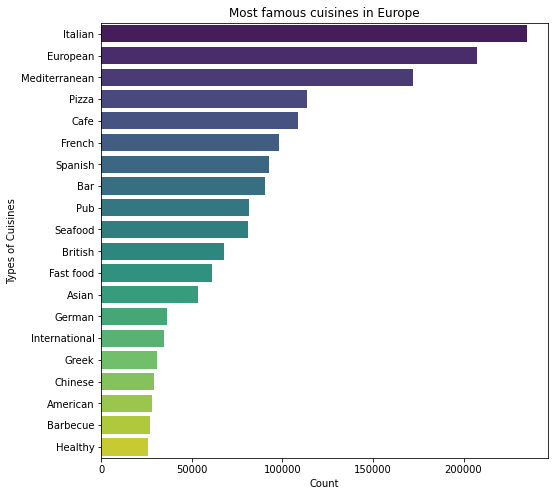

In [31]:
#removing null cuisine values
restaurants_df_cui = restaurants_df[~restaurants_df.cuisines.isin(['NaN', 'nan', '', ' ', "NaN", "nan", "", " ", np.nan, np.NaN])]
restaurants_df_cui.cuisines = restaurants_df.cuisines.astype(str)
cuisines=",".join(restaurants_df_cui.cuisines)
cuisines= [x.strip() for x in cuisines.split(',')]
cuisines=Counter(cuisines)
top_10_cuisines=[x for x in cuisines.most_common(20)]
a,b=map(list,zip(*top_10_cuisines))
plt.figure(figsize=(8,8))
sns.barplot(b,a,palette="viridis")
plt.title("Most famous cuisines in Europe")
plt.ylabel("Types of Cuisines")
plt.xlabel("Count")

We can see that Italian, European, and Mediterranean are the top 3 most favorite cuisines amongst the people of Europe. So, we can conclude that a restaurant with any of these cuisines is more likely to succeed. 

### 3) Regions with highest number of active restaurant customers

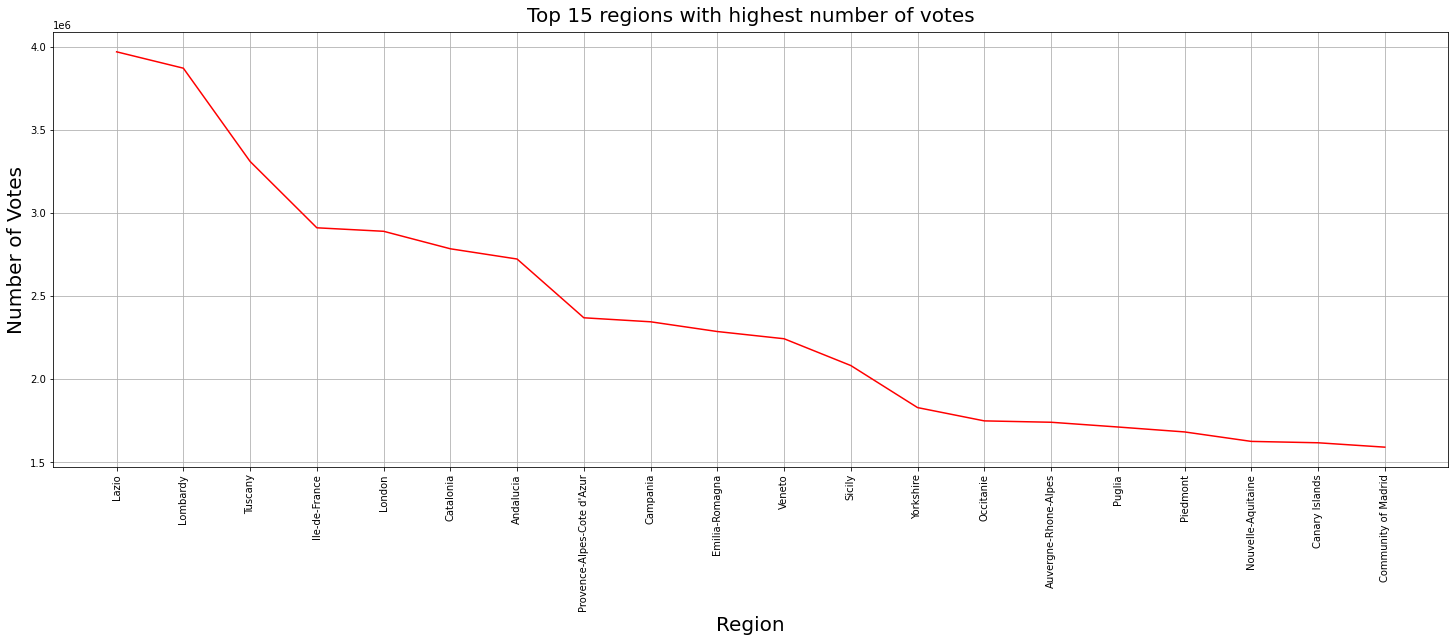

In [32]:
temp = restaurants_df.groupby('region')['total_reviews_count'].sum().sort_values(ascending=False)[:20,]
ax = temp.plot(figsize=(25,8), grid=True, color = 'red')
ax.set_xticks(range(len(temp)))
ax.set_xticklabels(temp.index, rotation=90)
ax.set_xlabel('Region', fontsize=20)
ax.set_ylabel('Number of Votes', fontsize=20)
ax.set_title('Top 15 regions with highest number of votes', fontsize=20, pad = 10)
plt.show()

We can see that the regions of Lazio, Lombardy, and Tuscany have the customers actively giving most number of rating values in their reviews. Hence, we can conclude that the customers in these regions are highly inclined towards visisting restaurants and are foodies. Restaurants in these areas can see highest customer engagement rate with the restaurant experience. 

### 4) What are the top 10 provinces with most spending in restaurants?

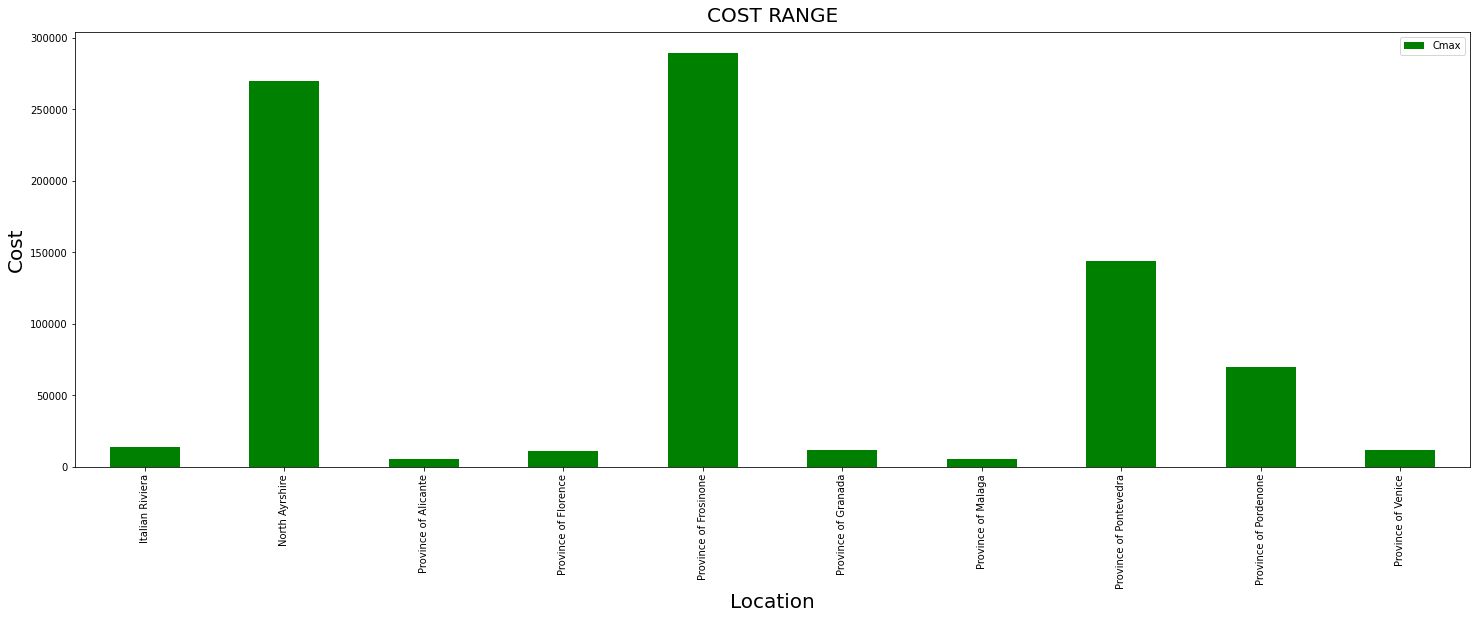

In [33]:
province = restaurants_df.groupby('province')['Average Price'].agg('mean').sort_values(ascending = False).head(10)
province_df = pd.DataFrame({'province':province.index, 'Average Price':province.values})
restaurants_df2 = restaurants_df[restaurants_df['province'].isin(list(province_df['province']))]
temp = restaurants_df2.groupby('province')['Average Price'].agg([ ('Cmax','mean')])
ax = temp.plot(figsize=(25,8), kind='bar', color = 'green')
ax.set_xticks(range(len(temp)))
ax.set_xticklabels(temp.index, rotation=90)
ax.set_xlabel('Location', fontsize=20)
ax.set_ylabel('Cost', fontsize=20)
ax.set_title('COST RANGE', fontsize=20, pad = 10)
plt.show()

We can see that the Province of Frosinone and North Ayrshire single-handedly dominate the entire restaurant business amongst all the provinces with more spending and hence, we can conclude that a restaurant in these provinces can price their items at a higher level without significantly affecting the customer experience and potentially generate more revenues.    

### 5) Restaurant Category Distribution Analysis

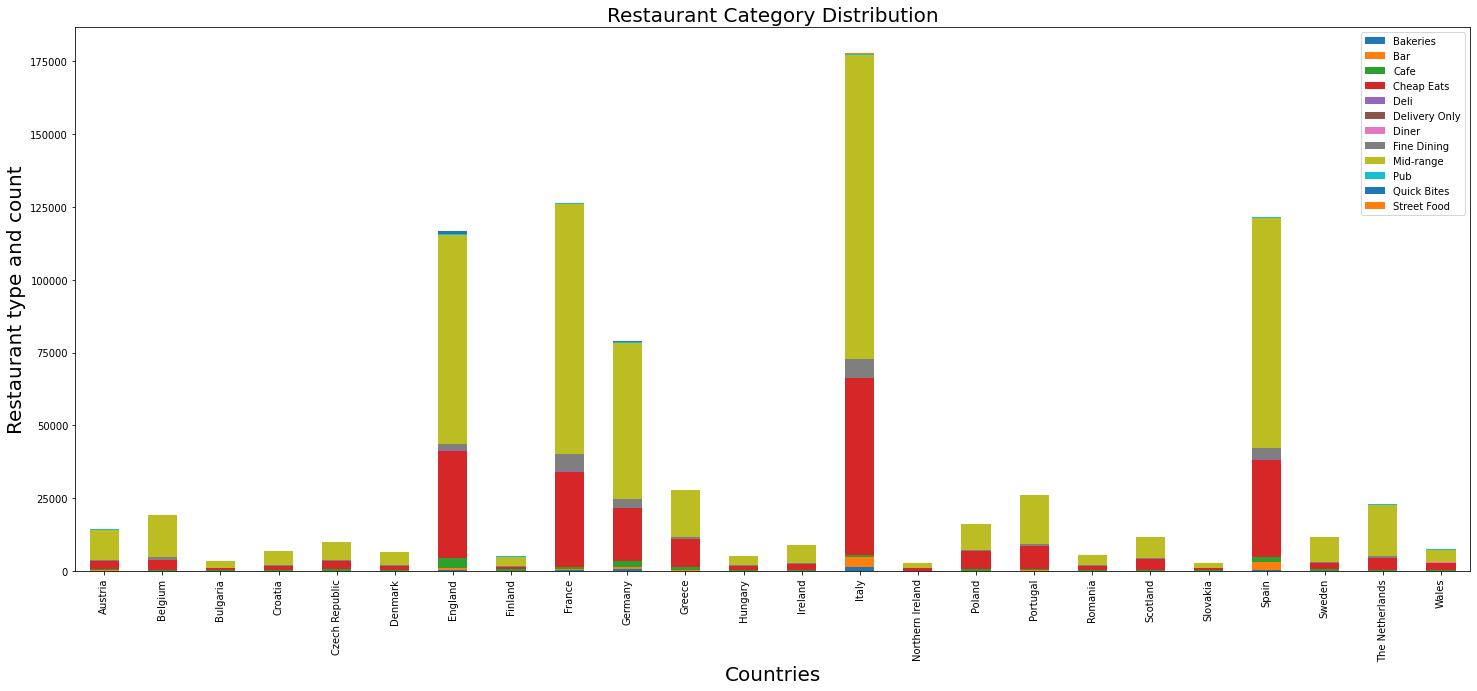

In [34]:
restaurants_df_cat = restaurants_df[restaurants_df['Category'].isin(['Bakeries', 'Bar', 'Pub', 'Cafe', 'Cheap Eats', 'Deli', 'Delivery Only', 'Diner', 'Fast Food', 'Fine Dining', 'Mid-range', 'Quick Bites', 'Street Food'])]
temp = restaurants_df_cat[['country', 'Category']].groupby(['country', 'Category']).size().reset_index()
ax = temp.set_index(['country', 'Category']).unstack(level=1).plot(kind='bar', stacked=True, figsize=(25, 10))
ax.set_title('Restaurant Category Distribution', fontsize=20)
ax.set_xlabel('Countries', fontsize=20)
ax.set_ylabel('Restaurant type and count', fontsize=20)
ax.legend(temp['Category'].unique())
plt.show()

From this graph, we can see that Mid-range restaurants are dominating the restaurant business scene in all the European countries followed by Cheap Eats restaurants. So, it might be profitable to establish restaurants of these categories. 

### 6) How do the features claimed_by_tripadvisor, vegetarian_friendly, gluten_free, vegan_options affects the restaurant rating value?

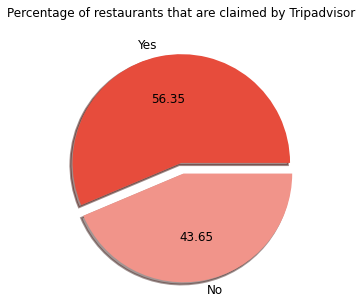

In [35]:
plt.figure(figsize=(5, 5))
restaurants_df.claimed_by_tripadvisor.value_counts().plot(kind = 'pie', autopct = '%.2f', radius = 1,
                                        colors = ['#E74C3C', '#F1948A'], explode = [0,0.1], 
                                        labels = ['Yes', 'No'], shadow = True,
                                        textprops = dict(size=12), wedgeprops = dict(linewidth=2))
plt.axis('off')
plt.title('Percentage of restaurants that are claimed by Tripadvisor', pad = 10)
plt.show()

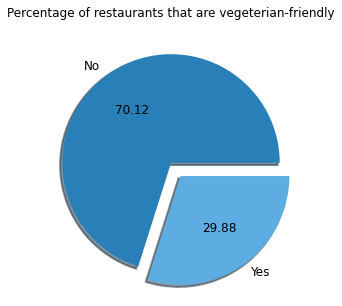

In [36]:
#How does vegetarian_friendly affect rating?
plt.figure(figsize=(5, 5))
restaurants_df.vegetarian_friendly.value_counts().plot(kind = 'pie', autopct = '%.2f', radius = 1,
                                        colors = ['#2980B9', '#5DADE2'], explode = [0,0.15], 
                                        labels = ['No','Yes'], shadow = True,
                                        textprops = dict(size=12), wedgeprops = dict(linewidth=2))
plt.axis('off')
plt.title('Percentage of restaurants that are vegeterian-friendly', pad = 10)
plt.show()



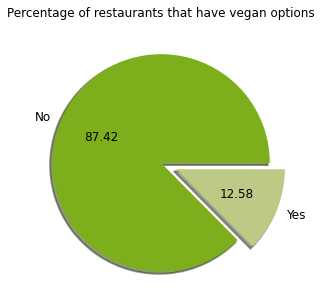

In [37]:
#How does vegan options affect rating?
plt.figure(figsize=(5, 5))
restaurants_df.vegan_options.value_counts().plot(kind = 'pie', autopct = '%.2f', radius = 1,
                                        colors = ['#7dae1b','#bcca85'], explode = [0,0.15], 
                                        labels = ['No','Yes'], shadow = True,
                                        textprops = dict(size=12), wedgeprops = dict(linewidth=2))
plt.axis('off')
plt.title('Percentage of restaurants that have vegan options', pad = 10)
plt.show()

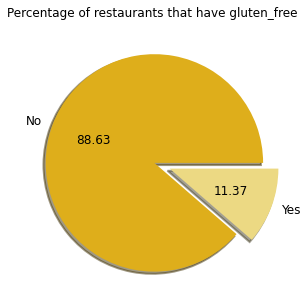

In [38]:
#How does gluten_free  affect rating?
plt.figure(figsize=(5, 5))
restaurants_df.gluten_free.value_counts().plot(kind = 'pie', autopct = '%.2f', radius = 1,
                                        colors = ['#deae1b','#ecd983'], explode = [0,0.15], 
                                        labels = ['No','Yes'], shadow = True,
                                        textprops = dict(size=12), wedgeprops = dict(linewidth=2))
plt.axis('off')
plt.title('Percentage of restaurants that have gluten_free ', pad = 10)
plt.show()

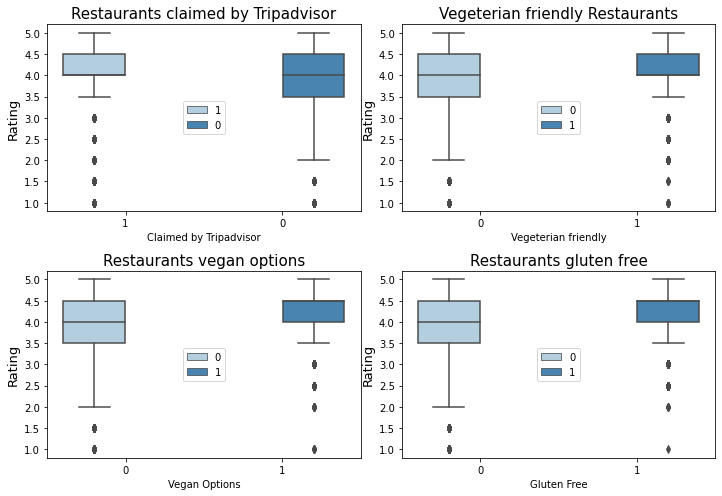

In [39]:
#how rating is affected based on these factors
plt.figure(figsize = (10,7))

plt.subplot(2,2,1)
sns.boxplot(x = 'claimed_by_tripadvisor', y = 'avg_rating', data = restaurants_df, hue = 'claimed_by_tripadvisor', palette="Blues")
plt.title('Restaurants claimed by Tripadvisor', fontsize = 15)
plt.xlabel('Claimed by Tripadvisor')
plt.ylabel('Rating', fontsize = 13)
plt.legend(loc = 'center')

plt.subplot(2,2,2)
sns.boxplot(x = 'vegetarian_friendly', y = 'avg_rating', data = restaurants_df, hue = 'vegetarian_friendly', palette="Blues")
plt.title('Vegeterian friendly Restaurants', fontsize = 15)
plt.xlabel('Vegeterian friendly')
plt.ylabel('Rating', fontsize = 13)
plt.legend(loc = 'center')

plt.subplot(2,2,3)
sns.boxplot(x = 'vegan_options', y = 'avg_rating', data = restaurants_df, hue = 'vegan_options', palette="Blues")
plt.title('Restaurants vegan options', fontsize = 15)
plt.xlabel('Vegan Options')
plt.ylabel('Rating', fontsize = 13)
plt.legend(loc = 'center')

plt.subplot(2,2,4)
sns.boxplot(x = 'gluten_free', y = 'avg_rating', data = restaurants_df, hue = 'gluten_free', palette="Blues")
plt.title('Restaurants gluten free', fontsize = 15)
plt.xlabel('Gluten Free')
plt.ylabel('Rating', fontsize = 13)
plt.legend(loc = 'center')

plt.tight_layout()
plt.show()

From the above graph, it can be seen that all the restaurants having the 4 features have avg_rating value ranging from 3.5-5, falling into the best category whereas restaurants not having these features have their avg_rating value starting from 1, falling into bad category. Hence, we can conclude that having these features positively impacts the rating value. 

### 7) What are the top provinces with most awarded restaurants?

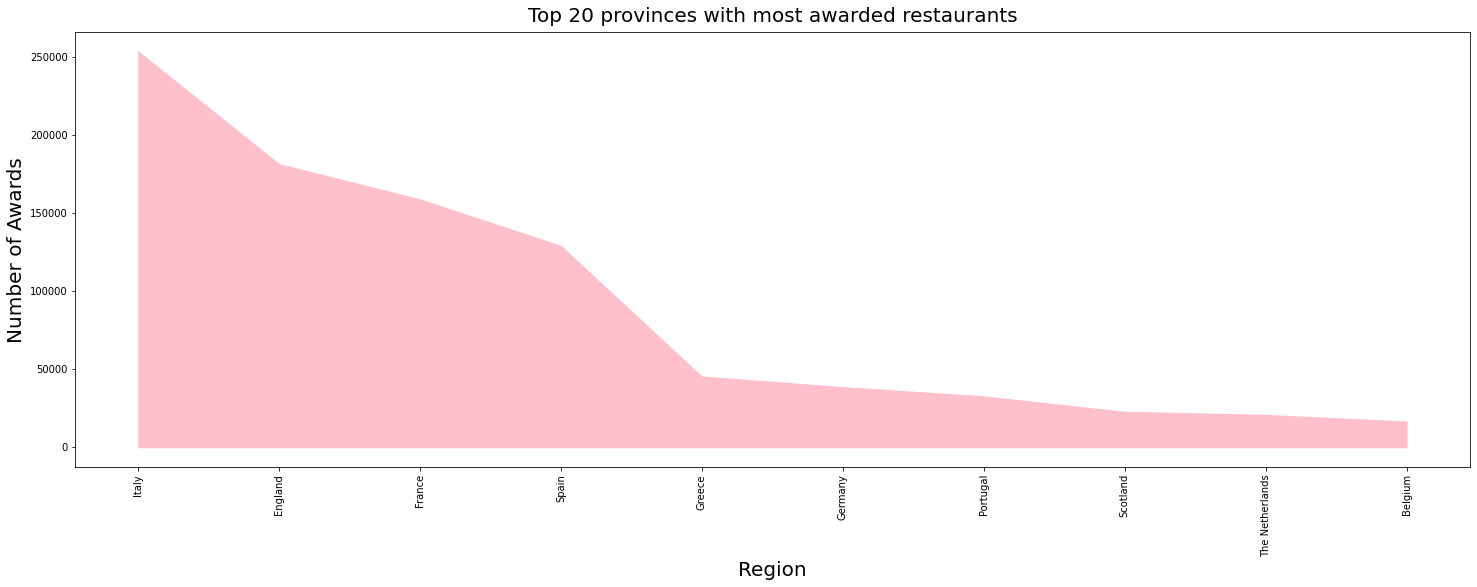

In [40]:
temp = restaurants_df.groupby('country')['Number of Awards'].sum().sort_values(ascending=False)[:10,]
ax = temp.plot(figsize=(25,8), kind = 'area', color = 'pink')
ax.set_xticks(range(len(temp)))
ax.set_xticklabels(temp.index, rotation=90)
ax.set_xlabel('Region', fontsize=20)
ax.set_ylabel('Number of Awards', fontsize=20)
ax.set_title('Top 20 provinces with most awarded restaurants', fontsize=20, pad = 10)
plt.show()

In the graph, we can see that Italy is the destination for highly awarded and prestigious restaurants all across Europe followed by England. So, in these provinces, it might become difficult for new restaurants to match up to the reputation created by well-established restaurants.

### 8) Do customers prefer food quality or quantity?

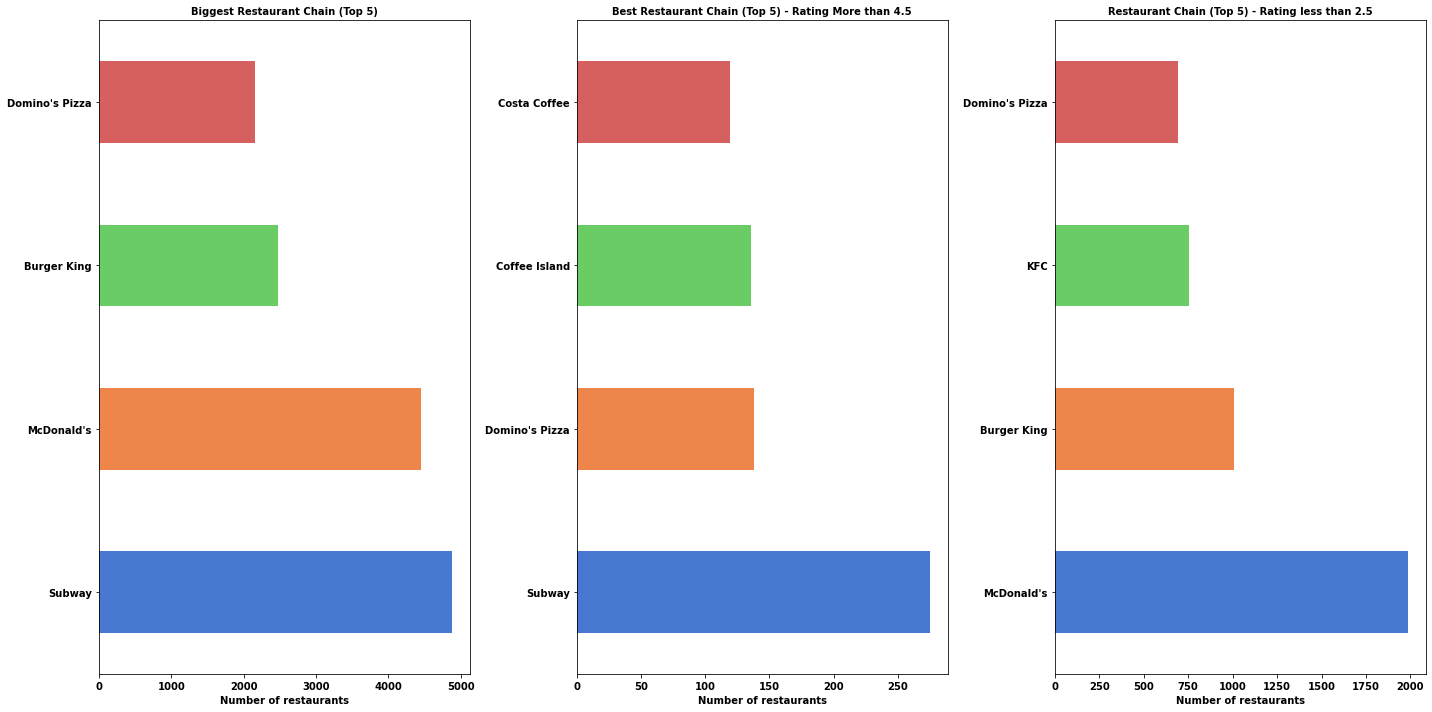

In [41]:
plt.rcParams['figure.figsize'] = 20,10
plt.subplot(1,3,1)
restaurants_df.restaurant_name.value_counts().nlargest(4).plot(kind = "barh", color = sns.color_palette("muted"))
plt.xlabel("Number of restaurants",fontsize=10,fontweight='bold')
plt.title("Biggest Restaurant Chain (Top 5)",fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');


plt.subplot(1,3,2)
restaurants_df[restaurants_df['avg_rating']>= 4.5]['restaurant_name'].value_counts().nlargest(4).plot(kind = "barh", color = sns.color_palette("muted"))
plt.xlabel("Number of restaurants",fontsize=10,fontweight='bold')
plt.title("Best Restaurant Chain (Top 5) - Rating More than 4.5",fontsize=10,fontweight='bold')
plt.tight_layout()
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

plt.subplot(1,3,3)
restaurants_df[restaurants_df['avg_rating'] <= 2.5]['restaurant_name'].value_counts().nlargest(4).plot(kind = "barh", color = sns.color_palette("muted"))
plt.xlabel("Number of restaurants",fontsize=10,fontweight='bold')
plt.title("Restaurant Chain (Top 5) - Rating less than 2.5",fontsize=10,fontweight='bold')
plt.tight_layout()
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

From this comparison, we can see that McDonalds is one of biggest restaurant chain across Europe with around 4500 McDonalds restaurants across Europe. But, McDonalds has the worst rating value with more than 2000 user reviews giving it a rating of less than 2.5. Hence, we can conclude that customers prefer quality over quantity, and having more number of restaurants doesn’t guarantee good ratings and customer experience; the food quality, and service, value, and atmosphere ratings play a significant role here. 

### 9) Does restaurant category affect its rating?

<Figure size 576x576 with 0 Axes>

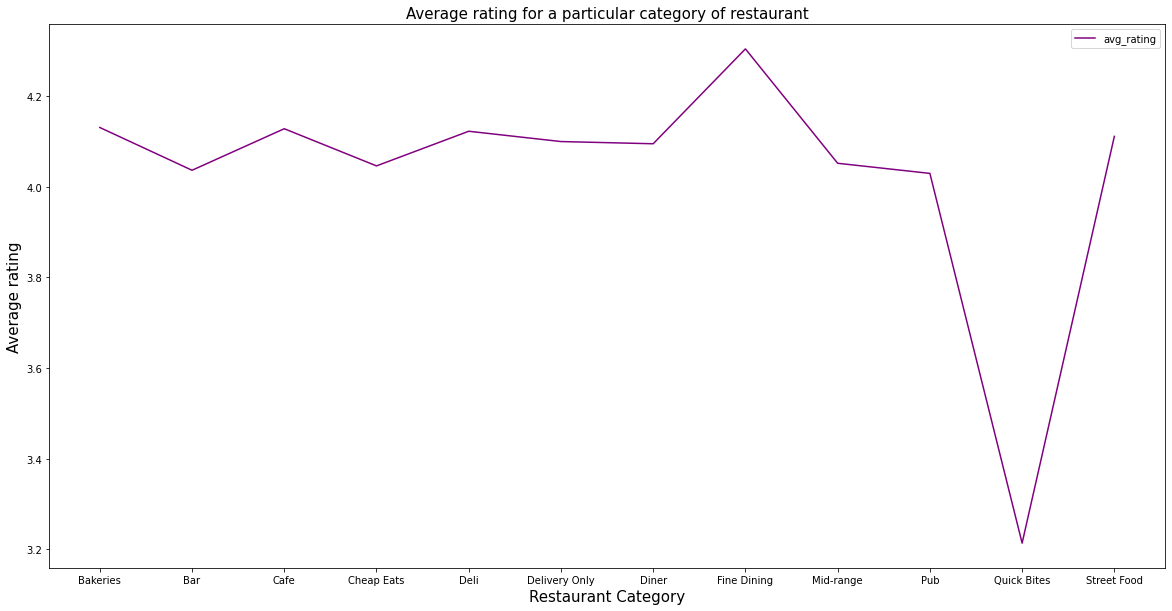

In [42]:
plt.figure(figsize = (8,8))
temp = restaurants_df_cat.groupby('Category')['avg_rating'].mean().reset_index()
ax = temp.plot(color = 'purple')
ax.set_xticks(temp.index)
ax.set_xticklabels(temp['Category'], fontsize=10)
ax.set_ylabel('Average rating', fontsize=15)
ax.set_xlabel('Restaurant Category', fontsize=15)
ax.set_title('Average rating for a particular category of restaurant', fontsize=15)
plt.legend(loc='best')
plt.show()

From this graph, we can see that the best ratings are for Fine Dining restaurants closely followed by Deli restaurants. It is to be noted here that Quick Bites restaurants have the least rating values in this case, so it can be deduced that Fine Dining restaurants are more popular and Quick Bites restaurants are least popular amongst Europeans. 

### 10) How does number of working days affect the number of reviews received by restaurant?

<Figure size 576x576 with 0 Axes>

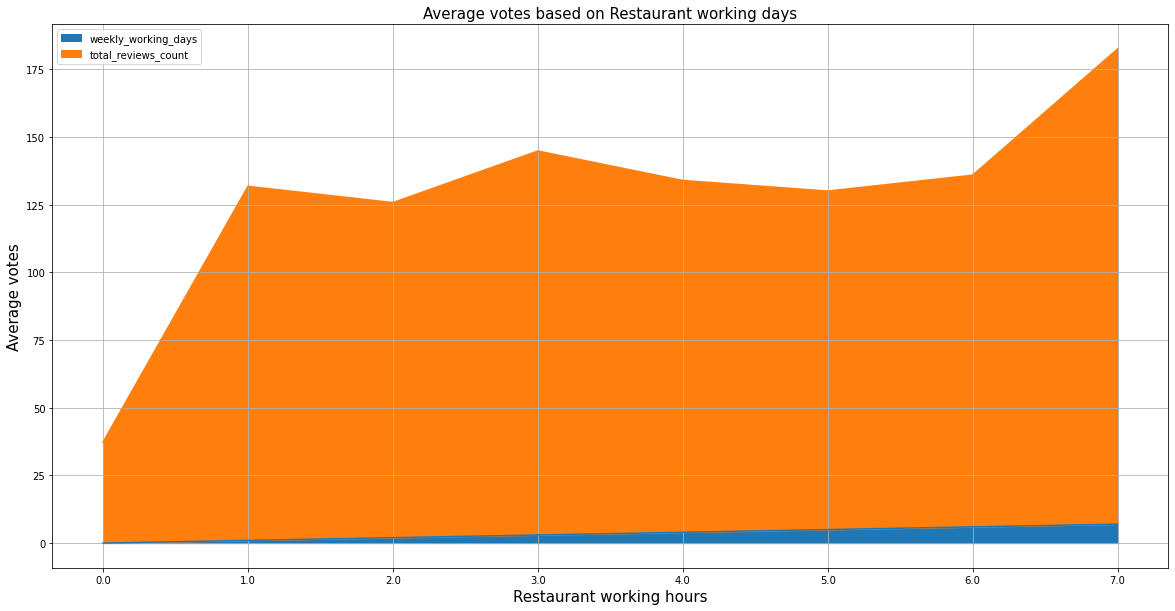

In [43]:
plt.figure(figsize = (8,8))
temp = restaurants_df.groupby('weekly_working_days')['total_reviews_count'].mean().reset_index()
ax = temp.plot(kind = 'area', grid = True)
ax.set_xticks(temp.index)
ax.set_xticklabels(temp['weekly_working_days'], fontsize=10)
ax.set_ylabel('Average votes', fontsize=15)
ax.set_xlabel('Restaurant working hours', fontsize=15)
ax.set_title('Average votes based on Restaurant working days', fontsize=15)
plt.legend(loc='best')
plt.show()

From the graph, we can clearly see that number of reviews is directly proportional to the number of days the restaurant is open in a week. That is, a restaurant that is open all the days in a week receives more number of customers, hence more number of reviews, when compared to restaurants which are not open all days in a week. 

### 11) What are the popular meal types in European restaurants?

/Users/gauthamrajsimhapulipati/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/gauthamrajsimhapulipati/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Count')

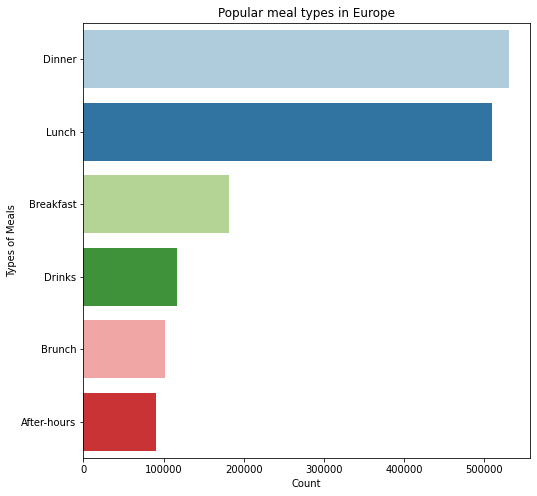

In [44]:
restaurants_df_meal = restaurants_df[~restaurants_df.meals.isin(['NaN', 'nan', '', ' ', "NaN", "nan", "", " ", np.nan, np.NaN])]
restaurants_df_meal.meals = restaurants_df.meals.astype(str)
meals=",".join(restaurants_df_meal.meals)
meals= [x.strip() for x in meals.split(',')]
# print(cuisines[:100])
meals=Counter(meals)
top_10_meals=[x for x in meals.most_common(20)]
a,b=map(list,zip(*top_10_meals))
plt.figure(figsize=(8,8))
sns.barplot(b,a,palette="Paired")
plt.title("Popular meal types in Europe")
plt.ylabel("Types of Meals")
plt.xlabel("Count")

From the graph, we can see that dinner and lunch are the predominant meal types across European restaurants. So, a restaurant can consider including these meal types in their menus to attract more customers and generate more revenue. 

### 12) How do features affect rating?

/Users/gauthamrajsimhapulipati/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/gauthamrajsimhapulipati/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Count')

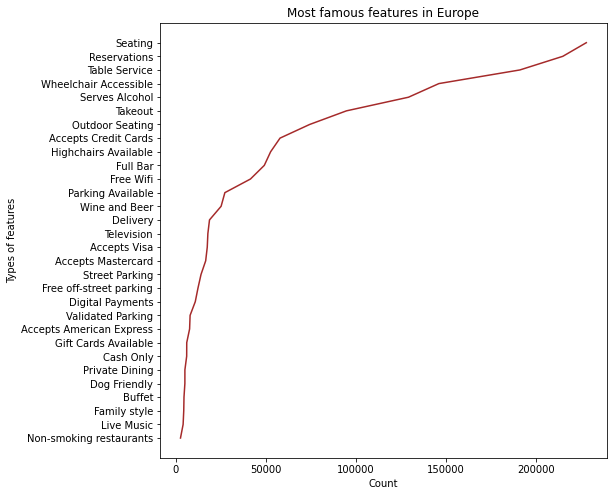

In [45]:
restaurants_df_feat = restaurants_df[~restaurants_df.features.isin(['NaN', 'nan', '', ' ', "NaN", "nan", "", " ", np.nan, np.NaN])]
restaurants_df_feat.features = restaurants_df.features.astype(str)
features=",".join(restaurants_df_feat.features)
features= [x.strip() for x in features.split(',')]
# print(cuisines[:100])
features=Counter(features)
top_10_features=[x for x in features.most_common(30)]
a,b=map(list,zip(*top_10_features))
%matplotlib inline
plt.figure(figsize=(8,8))
sns.lineplot(b,a,color = 'brown')
plt.title("Most famous features in Europe")
plt.ylabel("Types of features")
plt.xlabel("Count")

From the graph, we can see that most of the restaurants have Seating feature, followed by Reservations and Table Service respectively. So, having one or more of these features in the restaurant can prove to be beneficial for the restaurant revenue.

## Correlation between features

In [46]:
restaurants_data = restaurants_df
def Encode(restaurants_data):
    for column in restaurants_data.columns[~restaurants_data.columns.isin(['price_range', 'avg_rating', 'total_reviews_count', 'Minimum Price', 'Maximum Price', 'Average Price', 'Number of Awards'])]:
        restaurants_data[column] = restaurants_data[column].factorize()[0]
    return restaurants_data

tripadvisor_encode = Encode(restaurants_data.copy())

In [47]:
#viewing the correlation matrix
tripadvisor_encode.corr()

,restaurant_name,country,region,province,city,address,claimed_by_tripadvisor,awards,popularity_detailed,popularity_generic,...,food_rating,service_rating,value_rating,atmosphere_rating,keywords,Number of Awards,Minimum Price,Maximum Price,Average Price,Category
restaurant_name,1.000000,0.810571,0.772970,0.637976,0.236329,0.853944,-0.042588,0.008543,0.736082,0.732426,...,-0.035431,-0.021968,-0.029731,-0.011609,0.148939,0.036542,0.000443,0.000290,0.000322,0.019982
country,0.810571,1.000000,0.885914,0.697265,0.324657,0.944471,0.005302,-0.006376,0.789303,0.785734,...,-0.035508,-0.021278,-0.027827,-0.025957,0.127474,0.004360,0.000034,0.000159,0.000141,0.019554
region,0.772970,0.885914,1.000000,0.672470,0.152558,0.904054,-0.031305,0.011642,0.762344,0.759114,...,-0.024287,-0.003726,-0.015653,0.018153,0.132284,0.036208,0.000223,0.000386,0.000367,-0.006638
province,0.637976,0.697265,0.672470,1.000000,-0.071569,0.739833,-0.019942,-0.002912,0.631261,0.627960,...,-0.034453,-0.013213,-0.033631,0.004255,0.030743,0.029760,0.000658,0.000891,0.000873,-0.008879
city,0.236329,0.324657,0.152558,-0.071569,1.000000,0.281441,0.026909,0.009160,0.236653,0.236793,...,0.006049,-0.023201,0.005663,-0.036125,0.215268,0.010510,-0.000613,-0.001638,-0.001503,0.043336
address,0.853944,0.944471,0.904054,0.739833,0.281441,1.000000,-0.012200,0.007374,0.844724,0.840472,...,-0.028887,-0.011499,-0.021456,-0.000758,0.164602,0.029554,0.000149,0.000136,0.000142,0.014274
claimed_by_tripadvisor,-0.042588,0.005302,-0.031305,-0.019942,0.026909,-0.012200,1.000000,-0.160708,-0.101945,-0.104170,...,-0.071449,-0.059365,-0.059376,-0.194471,-0.221564,-0.359796,-0.001837,-0.002468,-0.002419,0.228637
awards,0.008543,-0.006376,0.011642,-0.002912,0.009160,0.007374,-0.160708,1.000000,0.038758,0.039283,...,-0.061160,0.037453,-0.050842,0.197599,0.172123,0.405174,-0.000358,-0.000194,-0.000226,-0.064419
popularity_detailed,0.736082,0.789303,0.762344,0.631261,0.236653,0.844724,-0.101945,0.038758,1.000000,0.994710,...,0.028657,0.051507,0.031902,0.066178,0.191340,0.091871,0.000368,0.000430,0.000429,-0.051161
popularity_generic,0.732426,0.785734,0.759114,0.627960,0.236793,0.840472,-0.104170,0.039283,0.994710,1.000000,...,0.029738,0.052670,0.032937,0.067310,0.190448,0.092904,0.000374,0.000438,0.000438,-0.050953


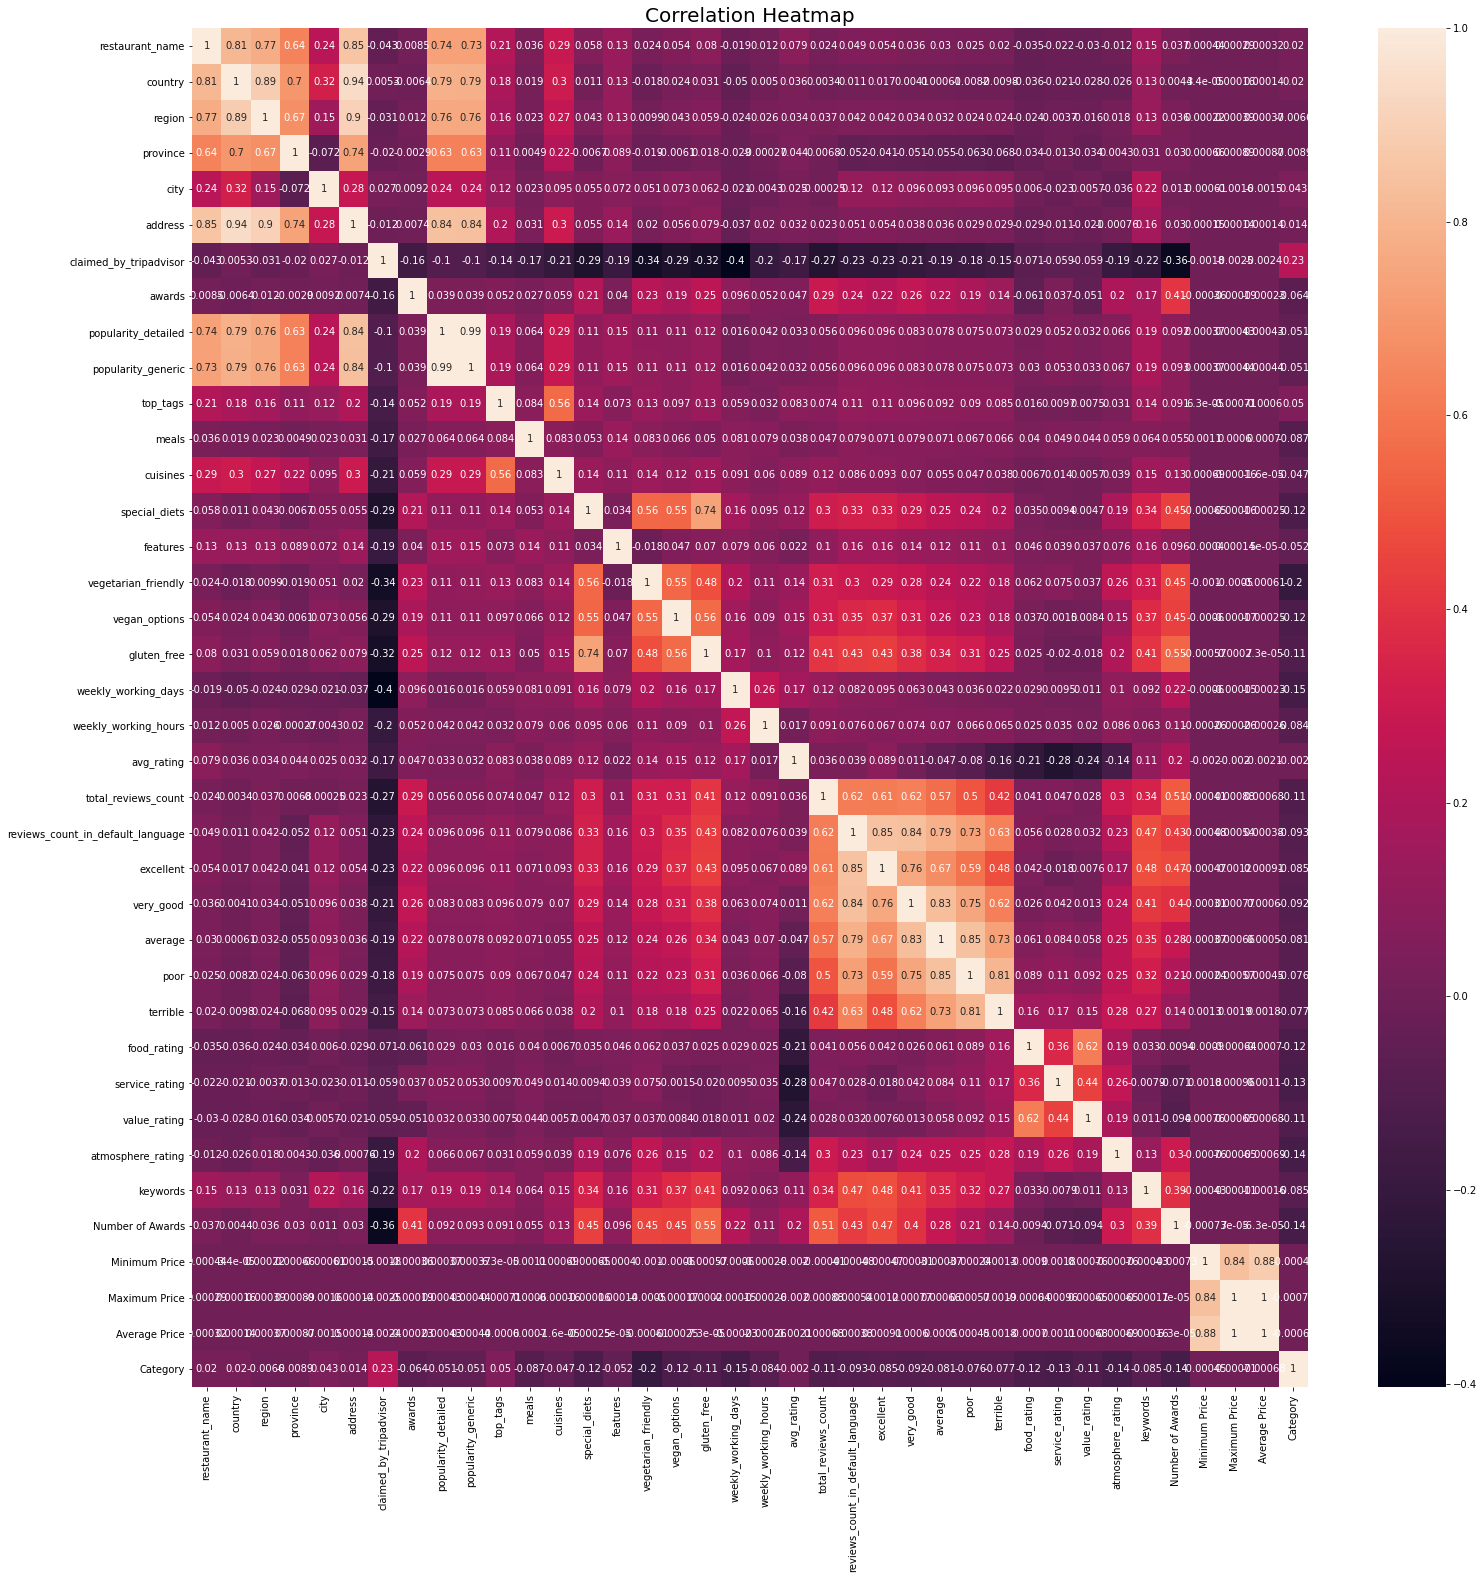

In [48]:
rcParams['figure.figsize'] = (25,25)
sns.heatmap(tripadvisor_encode.corr(), annot=True)
plt.title('Correlation Heatmap', size = 20)
plt.show()

# DataCleaning
Done By Gautham Rajsimha

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
# Count Vectorizer to change text to dummies
countvec=CountVectorizer()

The columns - cuisines, top tags, awards, keywords, meals, categories have a list of words that describe a specific attribute of a restaurant. We convert them into binary dummy columns to fit the data in a scaler model

We first remove the null(nan) values in this

In [51]:
# converting nan values to empty strings to fit in Count Vectorizer
restaurants_df['cuisines'] =restaurants_df['cuisines'].apply(lambda x: x if x is not np.nan else '')
restaurants_df['top_tags'] =restaurants_df['top_tags'].apply(lambda x: x if x is not np.nan else '')
restaurants_df['awards'] =restaurants_df['awards'].apply(lambda x: x if x is not np.nan else '')
restaurants_df['keywords'] =restaurants_df['keywords'].apply(lambda x: x if x is not np.nan else '')
restaurants_df['meals'] =restaurants_df['meals'].apply(lambda x: x if x is not np.nan else '')
restaurants_df['Category'] =restaurants_df['Category'].apply(lambda x: x if x is not np.nan else '')


Keywords have a lot of null values and hence we do not consider that column in the feature matrix 

In [52]:
# Converting text into dummies for cusines, top tags, meals and category
X = countvec.fit_transform(restaurants_df['cuisines']+' '+ restaurants_df['top_tags']+' '+restaurants_df['meals']+' '+restaurants_df['Category'])
feature_names = countvec.get_feature_names()
dummy_df = pd.DataFrame(X.todense(), columns=countvec.get_feature_names())
dummy_df

,afghani,african,after,albanian,algerian,american,anhui,apulian,arabic,argentinian,...,vegetarian,venezuelan,vietnamese,welsh,wine,with,xinjiang,yunnan,zealand,zhejiang
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1079186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1079187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1079188,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


These columns serve no purposse in determining the rating so we drop them

In [53]:
# Removing unwanted columns
restaurants_df = restaurants_df.drop(['features','address','special_diets','price_range',
                                      'popularity_generic', 'popularity_detailed'], axis = 1)


Since awards, top tags, meals, category and cuisines are converted into dummies, we can delete these columns

In [54]:
# Removing columns that were converted into dummies
restaurants_df = restaurants_df.drop(['awards','top_tags','meals', 'cuisines','keywords','Category'], axis = 1)
restaurants_df


,restaurant_name,country,region,province,city,claimed_by_tripadvisor,vegetarian_friendly,vegan_options,gluten_free,weekly_working_days,...,poor,terrible,food_rating,service_rating,value_rating,atmosphere_rating,Number of Awards,Minimum Price,Maximum Price,Average Price
0,Le 147,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,1,0,0,0,0.0,...,0.0,0.0,4.0,4.5,4.0,0.0,0,0.0,0.0,0.0
1,Le Saint Jouvent,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,Au Bout du Pont,France,Centre-Val de Loire,Berry,Rivarennes,1,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,Le Relais de Naiade,France,Nouvelle-Aquitaine,Correze,Lacelle,1,0,0,0,0.0,...,0.0,0.0,4.5,4.5,4.5,0.0,0,0.0,0.0,0.0
4,Relais Du MontSeigne,France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,0,0,0,0,0.0,...,0.0,0.0,4.5,4.5,4.5,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083392,Complex Popas Pacurari,Romania,Northeast Romania,Iasi County,NaN,0,0,0,0,7.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1083393,Casa Pastravarului DORIPESCO,Romania,Transylvania,Brasov County,Apata,1,0,0,0,7.0,...,1.0,2.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1083394,Hanul Tentea,Romania,Transylvania,Maramures County,Sacel,0,0,0,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1083395,Casa Paduraru,Romania,Southern Romania,Arges County,NaN,1,0,0,0,5.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0,2.0,8.0,5.0


In [55]:
# Dropping nan rows
restaurants_df.dropna(how='any',inplace=True)
restaurants_df.drop_duplicates(keep='first',inplace=True)

Label Encoding for the remaining text columns so that we have all of our text data only in numbers

In [56]:
# Initializing label encoder to convert text into label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [57]:
# Converting text into label encoding and storing it in dummy variables
new_restaurant_name = pd.DataFrame(labelencoder.fit_transform(restaurants_df['restaurant_name']), 
                                   columns=['restaurant_name'])
new_country = pd.DataFrame(labelencoder.fit_transform(restaurants_df['country']), columns=['country'])
new_province = pd.DataFrame(labelencoder.fit_transform(restaurants_df['province']), columns=['province'])
new_city = pd.DataFrame(labelencoder.fit_transform(restaurants_df['city']), columns=['city'])
new_region = pd.DataFrame(labelencoder.fit_transform(restaurants_df['region']), columns=['region'])


Dropping the columns that have been converted into numbers using Label Encoding

In [58]:
# Removing unwanted columns
restaurants_df = restaurants_df.drop(['restaurant_name','country', 'province','city','region'],axis=1)

In [59]:
# adding all the dummy variables into the dataframe
restaurants_df = pd.concat([restaurants_df, new_restaurant_name, new_country, new_province, new_city,new_region, dummy_df],axis=1)


We use standard scaler to transform the data into a unit variance

In [60]:
# Initializing scaler
scaler = StandardScaler()
x_fit = scaler.fit_transform(restaurants_df)

# converting data into a dataframe
scaled_df = pd.DataFrame(x_fit, columns=restaurants_df.columns)
scaled_df['rating'] = restaurants_df['avg_rating']
scaled_df['rating_lr'] = (restaurants_df['food_rating']+restaurants_df['service_rating']+restaurants_df['value_rating'])/3
scaled_df['rating_lr'] = (scaled_df['rating_lr']*restaurants_df['avg_rating']*2)/(scaled_df['rating_lr']+restaurants_df['avg_rating'])

del scaled_df['avg_rating']
scaled_df['rating']

We delete rows wuth null values and remove rows with any null values so that there are no unwanted rows in the training dataset

In [62]:
# Cleaning the scaled data, deleting null values
def clean_dataset(scaled_df):
    assert isinstance(scaled_df, pd.DataFrame), "df needs to be a pd.DataFrame"
    scaled_df.dropna(inplace=True)
    indices_to_keep = ~scaled_df.isin([np.nan, np.inf, -np.inf]).any(1)
    return scaled_df[indices_to_keep].astype(np.float64)
cleaned_df = clean_dataset(scaled_df)

In [63]:
# dropping target vector
X_data = cleaned_df.drop(['rating','rating_lr'],axis=1)
Y_data = cleaned_df.drop(cleaned_df.columns.difference(['rating']),axis=1)

Y_init is the target vector for all the models except Linear Regression
X_li_init is the target vector for Linear Regression model and is equal to the Arithmatic mean of Food Service and Value Rating applied harmonically on average rating

In [64]:
# Taking the initial data
X_init = X_data
X_init = X_init.drop(['food_rating','service_rating','value_rating'], axis=1)
Y_init = Y_data
Y_li_init = cleaned_df.drop(cleaned_df.columns.difference(['rating_lr']),axis=1)
bestfeatures = SelectKBest(k='all')
fit = bestfeatures.fit(X_init, Y_init)
# fit_lr = bestfeatures.fit(X_init, Y_lr_init)

/Users/gauthamrajsimhapulipati/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Scores is a dataframe that has the score of a particaular column and it's a maesure of the influence on the target vector.
columns_ is a dataframe that has the list of all columns ordered by their scores (descending)

In [65]:
# dataframes from SelectKBest
scores = pd.DataFrame(fit.scores_)
columns_ = pd.DataFrame(X_init.columns)

In [66]:
# Concatenating columns and scores
featurescore = pd.concat([columns_, scores],axis=1)

In [67]:
featurescore.columns = ['Features','Score']

In [68]:
# best 30 features
print(featurescore.nlargest(30,'Score'))

                              Features        Score
14                    Number of Awards  3204.676184
12                            terrible  1451.000150
13                   atmosphere_rating  1234.077021
1                  vegetarian_friendly  1057.952677
11                                poor   677.214844
0               claimed_by_tripadvisor   490.940865
6                  total_reviews_count   484.801724
2                        vegan_options   386.170386
8                            excellent   355.068290
10                             average   311.379479
9                            very_good   264.932985
3                          gluten_free   208.847726
4                  weekly_working_days   179.632013
7    reviews_count_in_default_language   107.734899
115                            guizhou    97.235861
5                 weekly_working_hours    83.221432
120                              henan    80.822115
50                               bites    75.410662
187         

We try different number of featuers to select the best combinatio of features that gives us a good value

In [69]:
# Selecting the best number of features
y_predt=0
y_testt=0
number_of_features = range(50,300,50)


mse_losses_features = []
r2_scores_features = []

for nf in number_of_features:
    
    print("Training Model with top ", nf, "features")
    fr = featurescore.nlargest(nf, 'Score')
    fr.drop('Score', axis=1, inplace=True)
    fr_list = list(fr.Features)
            
    x_nf = X_init.loc[:,fr_list]
    x_nf = x_nf.loc[:, ~x_nf.columns.duplicated()]
    Y_unscaled = Y_init
    X_train, X_test, y_train, y_test=train_test_split(x_nf, Y_unscaled, 
                                                      test_size = 0.05, random_state = 1)
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    y_pred_lr_nf = lr.predict(X_test)

    r2_score_lr_nf = r2_score(y_test, y_pred_lr_nf)

    mse_score_lr_nf = mean_squared_error(y_test, y_pred_lr_nf)
    if nf<150:
        y_predt = y_pred_lr_nf
        y_testt = y_test
    
    print("R-2 score  is :", r2_score_lr_nf,
          " Mean Squared Error is : ", mse_score_lr_nf)
    print("*" * 50)
    mse_losses_features.append(mse_score_lr_nf)
    r2_scores_features.append(r2_score_lr_nf)

Training Model with top  50 features
R-2 score  is : 0.19114719927647195  Mean Squared Error is :  0.4037979940041804
**************************************************
Training Model with top  100 features
R-2 score  is : 0.1904853578930502  Mean Squared Error is :  0.40412840050426996
**************************************************
Training Model with top  150 features
R-2 score  is : 0.17512011825849594  Mean Squared Error is :  0.41179908290318923
**************************************************
Training Model with top  200 features
R-2 score  is : 0.18352308753562574  Mean Squared Error is :  0.4076041266209725
**************************************************
Training Model with top  250 features
R-2 score  is : 0.17419287401231065  Mean Squared Error is :  0.4122619846403491
**************************************************


Since we do not have any substantial improvement on the r square with the increase in number of columns, we take the top 100 columns

In [71]:
# Selecting best 100 columns
col_select = featurescore.nlargest(100, 'Score')

In [72]:
# Dropping the rest
col_select.drop('Score', axis=1, inplace=True)

In [73]:
col_select_list = list(col_select.Features)

x_select is the data with the top 100 features

In [74]:
# Selecting the columns from the data
x_select = X_init.loc[:,col_select_list]
x_select.head()

,Number of Awards,terrible,atmosphere_rating,vegetarian_friendly,poor,claimed_by_tripadvisor,total_reviews_count,vegan_options,excellent,average,...,taiwanese,calabrian,czech,vegan,pub,southern,gastropub,armenian,polish,caucasian
0,-0.525223,-0.278032,-0.600239,-0.637109,-0.267191,1.008515,-0.294520,-0.380909,-0.270917,-0.273965,...,-0.019196,-0.017183,-0.071019,-0.123112,-0.272364,-0.122734,-0.110843,-0.016142,-0.091003,-0.01601
1,-0.525223,-0.278032,-0.600239,-0.637109,-0.267191,-0.991557,-0.416403,-0.380909,-0.270917,-0.205364,...,-0.019196,-0.017183,-0.071019,-0.123112,-0.272364,-0.122734,-0.110843,-0.016142,-0.091003,-0.01601
2,-0.525223,-0.278032,-0.600239,-0.637109,-0.267191,1.008515,-0.384949,-0.380909,-0.260021,-0.273965,...,-0.019196,-0.017183,-0.071019,-0.123112,-0.272364,-0.122734,-0.110843,-0.016142,-0.091003,-0.01601
3,-0.525223,-0.278032,-0.600239,-0.637109,-0.267191,1.008515,-0.302384,-0.380909,-0.281813,-0.273965,...,-0.019196,-0.017183,-0.071019,-0.123112,-0.272364,-0.122734,-0.110843,-0.016142,-0.091003,-0.01601
4,-0.525223,-0.278032,-0.600239,-0.637109,-0.267191,-0.991557,-0.392813,-0.380909,-0.249125,-0.273965,...,-0.019196,-0.017183,-0.071019,-0.123112,-0.272364,-0.122734,-0.110843,-0.016142,-0.091003,-0.01601


In [75]:
# removing duplicate columns
x_select = x_select.loc[:, ~x_select.columns.duplicated()]
Y_unscaled = Y_data.rating

# Linear Regression
Done by Gautham Rajsimha

In [76]:
# Splitting the data into Train and Test data
X_train, X_test, y_train, y_test=train_test_split(x_select, Y_li_init.rating_lr, 
                                                  test_size = 0.05, random_state = 42)

#### Target Vector is Y_li_init and we are using this to improve r square value of this model
#### We cut down the dataset to 50000 rows for best possible results

In [77]:
# Training the data with Linear Regression model

lr = LinearRegression()
lr.fit(X_train.head(50000), y_train.head(50000))

LinearRegression()

In [78]:
y_pred_lr = lr.predict(X_test)

# R-squared value of Linear Regressor model
r2_score_lr = r2_score(y_test, y_pred_lr)

# Mean-squared value of Linear Regressor model
mse_score_lr = mean_squared_error(y_test, y_pred_lr)

print("R squared score:", r2_score_lr,
      " Mean Squared Error : ", mse_score_lr)


R squared score: 0.31124859868099397  Mean Squared Error :  2.59976117938593


#### Juding by the r square value, we can conclude that this dataset does not fit well on a linear regression model

In [80]:
top_pred_lr = lr.predict(X_test.iloc[0:10, :])
print("Predictions of the first 10 examples from the test dataset \n")
for idx, v in enumerate(top_pred_lr):
    print("Rating : ",
          y_test.iloc[idx],
          ", Predicted Rating :", v)

Predictions of the first 10 examples from the test dataset 

Rating :  3.5 , Predicted Rating : 3.5349621772766113
Rating :  0.0 , Predicted Rating : 1.3042984008789062
Rating :  1.7142857142857142 , Predicted Rating : 2.0751829147338867
Rating :  4.915254237288136 , Predicted Rating : 3.0514559745788574
Rating :  4.7368421052631575 , Predicted Rating : 4.230720520019531
Rating :  3.75 , Predicted Rating : 2.0357627868652344
Rating :  0.0 , Predicted Rating : 1.396428108215332
Rating :  4.5 , Predicted Rating : 3.191941261291504
Rating :  3.8260869565217392 , Predicted Rating : 2.9474897384643555
Rating :  4.235294117647059 , Predicted Rating : 2.504594326019287


#### We can see the measure of error above for some of the predictions

#### Using normal rating from this model Y_unscaled which we got from Y_data

In [81]:
X_train, X_test, y_train, y_test=train_test_split(x_select,
                                                  Y_unscaled,
                                                  test_size = 0.05,
                                                  random_state = 42)

# DECISION TREE
Done by Gautham Rajsimha

#### We cut down on the data as it takes a lot of time to train a big dataset. Similar results with slight improvements were observed for full dataset

In [82]:
# initializing Grid Search for Decision tree

dt_ds = GridSearchCV(estimator=DecisionTreeRegressor(),
                     param_grid={"criterion": 
                                 ["mse", "friedman_mse", "mae"],
                                 "splitter": ["best"]})

#### training the model with 50000 rows as it almost takes 6 hours to train on full data

In [83]:
dt_ds.fit(X_train.head(50000), y_train.head(50000))

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'splitter': ['best']})

In [84]:
dt_ds.cv_results_

{'mean_fit_time': array([  0.46316023,   0.47864733, 461.2406775 ]),
 'std_fit_time': array([3.19795304e-02, 3.50639232e-02, 6.93517611e+01]),
 'mean_score_time': array([0.00428562, 0.01239271, 0.032903  ]),
 'std_score_time': array([0.00111473, 0.01578472, 0.01191598]),
 'param_criterion': masked_array(data=['mse', 'friedman_mse', 'mae'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_splitter': masked_array(data=['best', 'best', 'best'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'mse', 'splitter': 'best'},
  {'criterion': 'friedman_mse', 'splitter': 'best'},
  {'criterion': 'mae', 'splitter': 'best'}],
 'split0_test_score': array([0.5643567 , 0.5565077 , 0.48653268]),
 'split1_test_score': array([0.57220305, 0.56426   , 0.46928663]),
 'split2_test_score': array([0.5664681 , 0.58080717, 0.47413967]),
 'split3_test_score': array([0.58270717, 0.59307618, 0

#### Best parameters for this model

In [85]:
dt_ds.best_params_

{'criterion': 'friedman_mse', 'splitter': 'best'}

In [86]:
y_pred_dt = dt_ds.best_estimator_.predict(X_test.iloc[:, :])

# R-squared value of Decision Tree model
r2_score_dt = r2_score(y_test, y_pred_dt)

# R-squared value of Decision Tree model
mse_score_dt = mean_squared_error(y_test, y_pred_dt)

print("R square score:",
      r2_score_dt, " Mean Squared Error: ", 
      mse_score_dt)

R square score: 0.6035227674664361  Mean Squared Error:  0.2135210150674068


#### looking at the r square value and MSE, we can conclude that this model fits fairly well, and the value is almost 0.81 when trained with full dataset

In [87]:
top_pred_dt = dt_ds.predict(X_test.iloc[:10, :])
print("Predictions of the first 10 examples from the test dataset \n")
for idx, v in enumerate(top_pred_dt):
    print("Rating : ", y_test.iloc[idx],
          ", Predicted Rating :", v)

Predictions of the first 10 examples from the test dataset 

Rating :  3.5 , Predicted Rating : 4.5
Rating :  5.0 , Predicted Rating : 5.0
Rating :  1.5 , Predicted Rating : 1.5
Rating :  5.0 , Predicted Rating : 4.5
Rating :  5.0 , Predicted Rating : 4.5
Rating :  5.0 , Predicted Rating : 5.0
Rating :  4.5 , Predicted Rating : 4.0
Rating :  4.5 , Predicted Rating : 4.5
Rating :  4.0 , Predicted Rating : 4.0
Rating :  4.5 , Predicted Rating : 4.5


#### As we did not train on the entire data, some of the predictions have a higher error margin

# SUPPORT VECTOR REGRESSOR
Done by Gautham Rajsimha

In [88]:
# initializing and training the model

svr = SVR(kernel = 'rbf')
svr.fit(X_train.head(75000), y_train.head(75000))

SVR()

#### we used 75000 rows instead of the full dataset as the results were almost same and training the entire dataset takes a lot of time

In [89]:
y_pred_svr = svr.predict(X_test.iloc[:, :])

# R-squared value of SVR
r2_score_svr = r2_score(y_test, y_pred_svr)

# Mean-squared value of SVR
mse_score_svr = mean_squared_error(y_test, y_pred_svr)

print("R square score:", 
      r2_score_svr, " Mean Squared Error: ",
      mse_score_svr)

R square score: 0.3180946401003809  Mean Squared Error:  0.36723703829158993


#### similar to Linear Regression, we can see that this model does not fit well, but has a better MSE compared to Linear Regression

In [90]:
top_pred_svr = svr.predict(X_test.iloc[:10, :])
print("Predictions of the first 10 examples from the test dataset \n")
for idx, v in enumerate(top_pred_svr):
    print("True Rating : ", y_test.iloc[idx],
          ", Predicted Rating :", v)

Predictions of the first 10 examples from the test dataset 

True Rating :  3.5 , Predicted Rating : 3.952648312329949
True Rating :  5.0 , Predicted Rating : 4.1004416816223515
True Rating :  1.5 , Predicted Rating : 1.3851788966589793
True Rating :  5.0 , Predicted Rating : 4.500310259509006
True Rating :  5.0 , Predicted Rating : 5.136619268359779
True Rating :  5.0 , Predicted Rating : 4.491788563325329
True Rating :  4.5 , Predicted Rating : 4.250660094329148
True Rating :  4.5 , Predicted Rating : 4.4236017495890785
True Rating :  4.0 , Predicted Rating : 4.02782454495266
True Rating :  4.5 , Predicted Rating : 4.357434290646382


#### We can see the measure of error above for some of the predictions

# RANDOM FOREST
Done by Sushmita Jogula

In [91]:
X_train, X_test, y_train, y_test=train_test_split(x_select,
                                                  Y_unscaled,
                                                  test_size = 0.05,
                                                  random_state = 42)

In [92]:
# initializing and training the model
rf_ds = RandomForestRegressor(random_state=42)
rf_ds.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### We use the full dataset for this model as it gives fast and best results

In [93]:
y_pred_rf = rf_ds.predict(X_test.iloc[:, :])

# R-squared value of Random Forest model
r2_score_rf = r2_score(y_test, y_pred_rf)

# Mean-squared value of Random Forest model
mse_score_rf = mean_squared_error(y_test, y_pred_rf)

print("R square score:", 
      r2_score_rf, 
      "Mean Squared Error:",
      mse_score_rf)

R square score: 0.813802756826671 Mean Squared Error: 0.1002756806767116


#### The r squared value of this model proves that this model fits perfectly

In [94]:
top_pred_rf = rf_ds.predict(X_test.iloc[:10, :])
print("Predictions of the first 10 examples from the test dataset \n")
for idx, v in enumerate(top_pred_rf):
    print("True Rating : ", y_test.iloc[idx],
          ",Predicted Rating :", v)

Predictions of the first 10 examples from the test dataset 

True Rating :  3.5 ,Predicted Rating : 4.195
True Rating :  5.0 ,Predicted Rating : 5.0
True Rating :  1.5 ,Predicted Rating : 1.68
True Rating :  5.0 ,Predicted Rating : 4.66
True Rating :  5.0 ,Predicted Rating : 4.845
True Rating :  5.0 ,Predicted Rating : 5.0
True Rating :  4.5 ,Predicted Rating : 4.185
True Rating :  4.5 ,Predicted Rating : 4.385
True Rating :  4.0 ,Predicted Rating : 4.145
True Rating :  4.5 ,Predicted Rating : 4.575


#### We can see the measure of error above for some of the predictions which is marginal

# GRADIENT BOOSTING
Done by Sushmita Jogula

In [95]:
# initializing and trainig using gradient boosting
gbr = GradientBoostingRegressor(loss="huber")
gbr.fit(X_train, y_train)

GradientBoostingRegressor(loss='huber')

In [96]:
y_pred_gbr = gbr.predict(X_test.iloc[:, :])

# R-squared value of gradient boosting
r2_score_gbr = r2_score(y_test, y_pred_gbr)

# Mean-squared value of gradient boosting
mse_score_gbr = mean_squared_error(y_test, y_pred_gbr)

print("R square score:",
      r2_score_gbr, " Mean Squared Error is", mse_score_gbr)

R square score: 0.7128986090862004  Mean Squared Error is 0.15461715171750579


#### judging by the r square value above, this model fits good with the dataset but not as good as Random Forest

In [97]:
top_pred_gbr = gbr.predict(X_test.iloc[:10, :])
print("Predictions of the first 10 examples from the test dataset \n")
for idx, v in enumerate(top_pred_gbr):
    print("True Rating : ", 
          y_test.iloc[idx],
          ",Predicted Rating :", v)

Predictions of the first 10 examples from the test dataset 

True Rating :  3.5 ,Predicted Rating : 4.249036326286708
True Rating :  5.0 ,Predicted Rating : 4.796715276992027
True Rating :  1.5 ,Predicted Rating : 1.779283002532051
True Rating :  5.0 ,Predicted Rating : 4.625801516108199
True Rating :  5.0 ,Predicted Rating : 4.6711137713254995
True Rating :  5.0 ,Predicted Rating : 4.789387960756944
True Rating :  4.5 ,Predicted Rating : 4.256920296707539
True Rating :  4.5 ,Predicted Rating : 4.36493101331207
True Rating :  4.0 ,Predicted Rating : 3.9148926232893158
True Rating :  4.5 ,Predicted Rating : 4.451888907418005


#### We can see the measure of error above for some of the predictions which is marginal

# GRADIENT BOOSTING WITH GRIDSEARCH
Done by Gautham Rajsimha

In [98]:
# initializing and trainig using gradient boosting with GridSearch

gb_ds = GridSearchCV(estimator=GradientBoostingRegressor(),
                     param_grid={"loss": ["ls", "lad", "huber"],
                                 "n_estimators": [100, 200]})
gb_ds.fit(X_train.head(50000), y_train.head(50000))

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'loss': ['ls', 'lad', 'huber'],
                         'n_estimators': [100, 200]})

#### smaller dataset is used to save time as it gives similar results 

In [99]:
y_pred_gb_ds = gb_ds.predict(X_test.iloc[:, :])

# R-squared value of gradient boosting with gridsearch
r2_score_gb_ds = r2_score(y_test, y_pred_gb_ds)

# Mean-squared value of gradient boosting with gridsearch
mse_score_gb_ds = mean_squared_error(y_test, y_pred_gb_ds)

print("R square score:", r2_score_gb_ds, "Mean Squared Error: ", mse_score_gb_ds)

R square score: 0.7754377364408056 Mean Squared Error:  0.12093698837280555


#### judging by the r square value above, we can see an improvement from the normal Gradient Boosting model and this fits well with the given dataset 

In [100]:
top_pred_gb_ds = gb_ds.predict(X_test.iloc[:10, :])
print("Predictions of the first 10 examples from the test dataset \n")
for idx, v in enumerate(top_pred_gb_ds):
    print("True Rating : ", y_test.iloc[idx],
          ", Predicted Rating :", v)

Predictions of the first 10 examples from the test dataset 

True Rating :  3.5 , Predicted Rating : 4.191750448142788
True Rating :  5.0 , Predicted Rating : 4.7986695309628535
True Rating :  1.5 , Predicted Rating : 1.6027770797424241
True Rating :  5.0 , Predicted Rating : 4.616324117345453
True Rating :  5.0 , Predicted Rating : 4.6825220746041225
True Rating :  5.0 , Predicted Rating : 4.824986116026986
True Rating :  4.5 , Predicted Rating : 4.274514921463149
True Rating :  4.5 , Predicted Rating : 4.39066475145666
True Rating :  4.0 , Predicted Rating : 3.983315747465896
True Rating :  4.5 , Predicted Rating : 4.456872790775197


#### We can see the measure of error above for some of the predictions which is marginal

# Analysis
Done by Sushmita Jogula

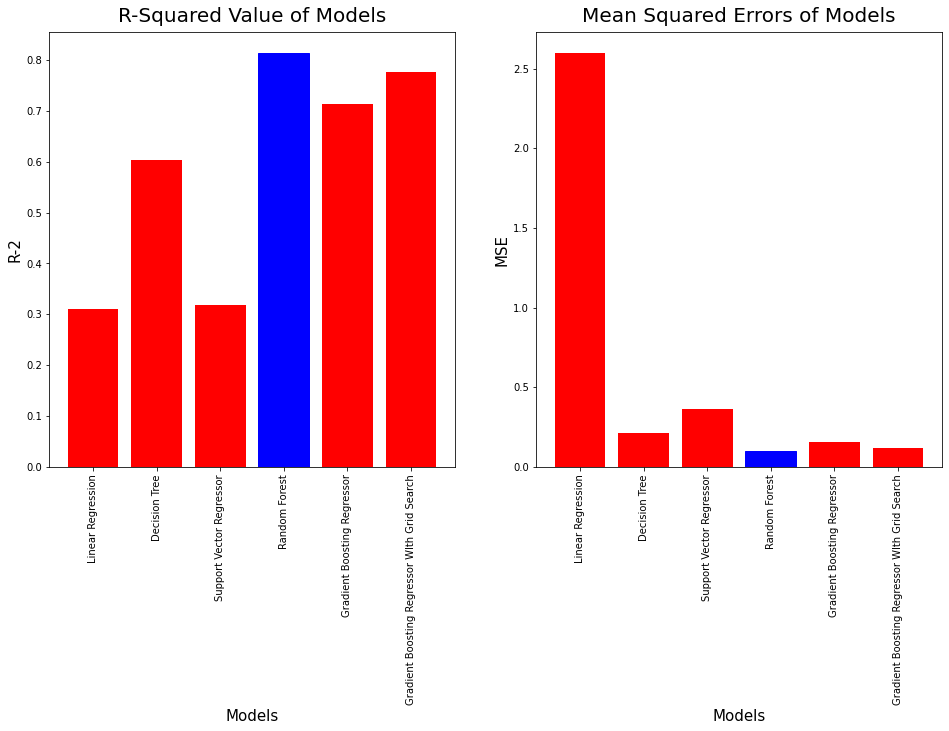

In [101]:
model_names = ["Linear Regression",
               "Decision Tree",
               "Support Vector Regressor", 
               "Random Forest",
               "Gradient Boosting Regressor",
               "Gradient Boosting Regressor WIth Grid Search"]
r_squared_vals = [r2_score_lr, 
                  r2_score_dt,
                  r2_score_svr,
                  r2_score_rf,
                  r2_score_gbr, 
                  r2_score_gb_ds]
mse_vals = [mse_score_lr, 
            mse_score_dt, 
            mse_score_svr,
            mse_score_rf, 
            mse_score_gbr,
            mse_score_gb_ds]

fig = plt.figure(figsize = (16, 8))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

bar1 = ax1.bar(model_names, r_squared_vals, color=('r'))
ax1.set_xticks(range(len(r_squared_vals)))
ax1.set_xticklabels(model_names, rotation=90)
ax1.set_xlabel('Models', fontsize=15)
ax1.set_ylabel('R-2', fontsize=15)
ax1.set_title('R-Squared Value of Models', fontsize=20, pad = 10)

bar1[3].set_color('b')

bar2 = ax2.bar(model_names, mse_vals, color=('r'))
ax2.set_xticks(range(len(r_squared_vals)))
ax2.set_xticklabels(model_names, rotation=90)
ax2.set_xlabel('Models', fontsize=15)
ax2.set_ylabel('MSE', fontsize=15)
ax2.set_title('Mean Squared Errors of Models', fontsize=20, pad = 10)

bar2[3].set_color('b')

In [102]:
top_pred = rf_ds.predict(X_test.iloc[0:10, :])
print("Predictions of the first 10 examples from the test dataset \n")
for idx, v in enumerate(top_pred):
    print("True Rating : ", y_test.iloc[idx], " and, Predicted Rating :", v)

Predictions of the first 10 examples from the test dataset 

True Rating :  3.5  and, Predicted Rating : 4.195
True Rating :  5.0  and, Predicted Rating : 5.0
True Rating :  1.5  and, Predicted Rating : 1.68
True Rating :  5.0  and, Predicted Rating : 4.66
True Rating :  5.0  and, Predicted Rating : 4.845
True Rating :  5.0  and, Predicted Rating : 5.0
True Rating :  4.5  and, Predicted Rating : 4.185
True Rating :  4.5  and, Predicted Rating : 4.385
True Rating :  4.0  and, Predicted Rating : 4.145
True Rating :  4.5  and, Predicted Rating : 4.575


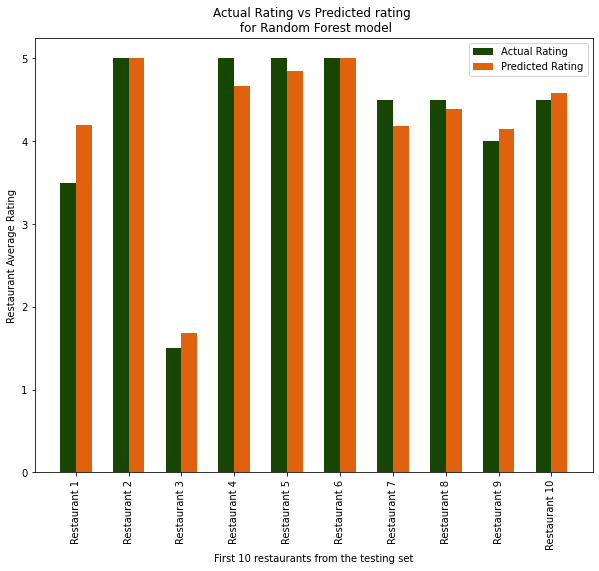

In [103]:
N = 10
true_rating = y_test.iloc[:10].tolist()
pred_rating = top_pred.tolist()
ind = np.arange(N)
plt.figure(figsize=(10,8))
width = 0.3       
plt.bar(ind, 
        true_rating , 
        width, 
        label='Actual Rating', 
        color="#174502")
plt.bar(ind + width,
        pred_rating,
        width,
        label='Predicted Rating', 
        color="#E0610E")

plt.xlabel('First 10 restaurants from the testing set')
plt.ylabel('Restaurant Average Rating')
plt.title('Actual Rating vs Predicted rating \n for Random Forest model')
plt.xticks(ind + width / 2, ('Restaurant 1', 'Restaurant 2', 'Restaurant 3', 'Restaurant 4', 'Restaurant 5', 
                             'Restaurant 6', 'Restaurant 7', 'Restaurant 8', 'Restaurant 9', 'Restaurant 10'), rotation=90)
plt.legend(loc='best')
plt.show()

# Conclusion
Done by Sushmita Jogula and Gautham Rajsimha
This study's purpose is to predict the average rating of restaurants in Europe recorded by Tripadvisor. We experimented with various machine learning models and methods. The Random Forest Regressor is the best model we found out of all the models we have implemented. This is a fascinating opportunity for business regions to assess restaurant features and customer preferences in Europe. With this knowledge, it is possible to examine the attributes of a restaurant before its establishment or during the initial stages of its establishment itself, and this information is highly significant for both businessmen and customers. 